Time checking:

In [1]:
!pip install pysolve3
from datetime import datetime
t1 = datetime.now()

     |████████████████████████████████| 5.3MB 9.3MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

# Changes

In this version, the autonomous growth rate is endogenized as a function of housing own interest rates:

$$
g_Z = \phi_0  + \phi_1\cdot \left(\frac{1+r_{mo}}{1+\dot p_h}-1\right)
$$
which

- $\phi_0$ and $\phi_1$ are parameters
- $\dot p_h$ is housing inflation and equals 0 in this version

$$
\dot p_h = \frac{\Delta p_h}{p_{h_{-1}}}
$$

$$
p_h = \xi \cdot YD
$$

## Variables list

- $C$ Consumption
- $CG$: Capital gains
- $FT$: Total profits
- $FD$: Distributed profits
- $FU$: Retained profits
- $g_i$: Growth rate of variable $i$
- $g^e_i$: Expected growth rate of variable $i$
- $h$: Marginal propensity to invest
- $I$: Total investment
- $I_f$: Non-residential investment
- $I_h$: Residential investment
- $K_f$: Non-residential fixed capital
- $K_h$: Residential capital
- $K_{HD}$: Demand for houses
- $K_{HU}$: Unsold houses
- $K_H$: Houses supply
- $L$: Loans
- $morp$: Mortgages repayments
- $M$: Money deposits
- $MO$: Mortgages
- $p_h$ Housing prices
- $r_l$: Interest rates on Loans
- $r_m$: Interest rates on money deposits
- $r_H$: Housing own interest rates
- $S_i$: Sector $i$ savings
- $u$: Capacity utilization ratio
- $v$: Capacity-Output ratio
- $V_i$: Net financial Wealth of sector $i$
- $W$ Total Wage bill
- $Y$: GDP
- $Y_K$: Capacity
- $YD$: Household disposable income
- $Z$: Autonomous expenditures

## Parameters list

- $\alpha$: Propensity to consume out of wages
- $\beta$: Expectation adjustment parameter
- $\gamma_F$: % of distributed profits
- $\gamma_u$: Adjustment parameter for the marginal propensity to invest

## Exogenous variables

- $gz$: Autonomous grouth rate
- $\omega$: Wage share
- $rm$: Interest rates on money deposits
- $spread_l$: Spread for loans
- $spread_{mo}$: Spread for mortgages
- $un$: Normal capacity utilization ratio
- $v$: Capitl-Output ratio

# Assumptions

## General

- No inflation
- Two kinds of capital: Residential and non-Residential
- No depeciation
- Non-residential investment is induced

## Households

- All savings are accumulated in bank deposits
- Households do not have access to Loans


## Firms


## Banks

- Have any net worth

# Matrix

## Balance sheet

|                	| Households 	|  Firms 	| Banks 	| $\sum$ 	|
|----------------	|:----------:	|:------:	|:-----:	|:------:	|
| Money Deposits 	|    $+M$    	|        	|  $-M$ 	|   $0$  	|
|Firms'  Loans          	|            	|  $-L_f$  	|  $+L_f$ 	|   $0$  	|
| Households' Loans          	|   $-L_h$	|   	|  $+L_h$ 	|   $0$  	|
| Mortgages          	| $-MO$           	|   	|  $+MO$ 	|   $0$  	|
| Capital        	|    |  $K_f$ 	|       	|   $K_f$  	|
| Houses 	|    $K_{HD}$    	| |  	|   $K_H$  	|
| Net Worth      	|   $V_h$   	| $V_f$ 	| $V_b$      	|  $K$  	|


## Transactions and flow  of funds matrix

|                            	|Households             	| Households  	| Firms                  	| Firms       	| Banks                  	|  Sum    	|
|----------------------------	|------------------------	|-------------	|------------------------	|-------------	|------------------------	|-------------	|
|                            	| Current                	| Capital     	| Current                	| Capital     	| Current                	| $\sum$ 	|
| Consumption                	| $-C$                   	|             	| $+C$                   	|             	|                        	|             	$0$    	|
| Investment                 	|                  	|             	| $+I_f$                    	| $-I_f$      	|                        	|             	$0$    	|
| Residential Investment                 	|                  	| $-I_h$            	| $+I_h$                    	|       	|                        	|             	 $0$    	|
| **[Production]**               	|                        	|             	| **[$Y$]**                  	|             	|                        	|             	$[Y]$    	|
| Wages                      	| $+W$                    	|             	| $-W$                   	|             	|                        	|             	$0$    	|
| Profits                      	| $+FD$                    	|             	| $-FT$                   	| $+FU$	|                        	|             	$0$    	|
| Interests on loans         	|  $-r_{l-1}\cdot L_{h_{-1}}$ 	|             	| $-r_{l-1}\cdot L_{f_{-1}}$ 	|             	| $+r_{l-1}\cdot L_{-1}$ 	|             	$0$    	|
| Interests on Bank deposits 	| $+r_{m-1}\cdot M_{-1}$ 	|             	|                        	|             	| $-r_{m-1}\cdot M_{-1}$ 	|             	$0$    	|
| Interests on Mortgage 	| $-r_{mo-1}\cdot MO_{-1}$ 	|             	|                        	|             	| $+r_{mo-1}\cdot MO_{-1}$  	|             	$0$    	|
| **Subtotal** 	| $+S_h$ 	| $-I_h$|                        	|  $+NFW_f$           	|  +$NFW_b$	|             	 $0$    	|
| Change in firms Loans            	|                        	|             	|                        	| $+\Delta L_f$ 	|                        	 $-\Delta L_f$ 	|$0$    	|
| Household new loans           	|$+N$|             	|                        	|  	|                        	 $-N$ 	|$0$    	|
| Change in Bank deposits    	| $-\Delta M$                       	|  	|                        	|             	|                        	$+\Delta M$ 	| $0$    	|
| Change in Mortgages    	|                        	| $+\Delta MO$ 	|                        	|             	|                        	$-\Delta MO$ 	| $0$    	|
| Sum    	| $0$                        	| $0$ 	| $0$| $0$| $0$| $0$| 

# Equations

## General Equations

$$
Y = C + I
$$

$$
I = I_f + I_h
$$

$$
\omega = \overline \omega
$$

$$
W = \omega \cdot  Y
$$

$$
Y_K = \frac{K_f}{\overline v}
$$

$$
u = \frac{Y}{Y_K}
$$

$$
g_k = \frac{h\cdot u}{v}
$$

$$
Z = I_h + N
$$

$$
K = K_f + K_{HD}
$$

## Households

$$
YD = W + FD + \overline r_{m-1}\cdot M_{-1} - \overline r_{mo-1}\cdot MO - r_l\cdot{L_h}
$$


$$
S_h = YD - C = \Delta M
$$

$$
C = \alpha\cdot W + N
$$

$$
\Delta L_h = N
$$

$$
N = (\Theta)\cdot I_{h_{-2}}
$$

$$
\Delta MO = I_h
$$

$$
V_h = M + K_H - MO - L_h
$$

$$
NFW_h = S_h - I_h
$$

## Firms

$$
\Delta L_f = I_f - FU
$$

$$
FT = Y - W = FU+ FD
$$

$$
FU = \gamma_F\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$


$$
FD = (1 - \gamma_F)\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$

$$
I_f = h\cdot Y
$$

$$
\Delta K_f = I_f
$$

$$
\Delta h = 
h_{-1}\cdot \gamma_u\cdot (u - \overline u_n)
$$

$$
V_f = K_f  - L_f
$$

$$
NFW_f = FU - I_f
$$

## Banks

$$
L = L_f + L_h
$$

$$
\Delta M = \Delta L + \Delta MO
$$

$$
NFW_b = rl_{-1}\cdot L_{-1} + rmo_{-1}\cdot MO_{-1} - rm_{-1}\cdot M_{-1}
$$

$$
r_l = r_m + spread_l (=0)
$$

$$
r_{mo} = r_m + spread_{mo} (=0)
$$

$$
V_b = L + MO - M
$$

## Residential Investment


$$
K_{HS} = K_{HD}
$$

$$
I_h^S = I_h
$$

$$
\Delta K_{HD} = I_h
$$

$$
I_h = (1+g_Z)\cdot I_{h_{-1}}
$$


$$
k = \frac{K_h}{K}
$$

# Simulation setup

## Loading libraries

In [0]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib.patheffects as pe
import seaborn as sns
from pysolve3.utils import ShockModel, SFCTable, SolveSFC, SummaryShock
from pysolve3.model import Model
import sympy as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Creating model function

In [0]:
def model(
    alpha = 1,
    gamma_F = 0.4,
    gamma_u = 0.01,
    g_Z = 0.05,
    omegapar = 0.5,
    rm = 0.02,
    spread_l = 0,
    spread_mo = 0,
    un = 0.8,
    v = 2.5,
    Theta = 0.35,
    phi_0 = 0.04,
    phi_1 = 0.5,
    infla = 0,
    phparam=1.0
):
  """
  phparam: 1.0 means no inflation
  """
  model = Model()
  model.set_var_default(0) 
  model.var('C', desc='Consumption')
  model.var('FD', desc='Distributed profits')
  model.var('Fn', desc='Net profits')
  model.var('FT', desc='Total Profits')
  model.var('FU', desc='Retained profits')
  model.var('gk', desc='Capital growth rate', default=0.01)
  model.var('g_Z', desc='Autonomous grouth rate', default=g_Z)
  model.var('h', desc='Marginal propensity to invest (non-residential)', default=0.30)
  model.var('I_t', desc='Investment', default = 100) # 200
  model.var('I_f', desc='Non-residential investment') # 100
  model.var('I_h', desc='Residential investment', default = 100) # 100
  model.var('Is', desc='Residential investment (Supply)', default = 100) # 100
  model.var('infla', desc='Housing inflation', default = phparam)
  model.var('K_HS', desc='Houses supply', default=500) # 500
  model.var('K_HD', desc='Houses demand', default=500) # 500
  model.var('K_f', desc='Non-residential capital', default = 1000) # 10000
  model.var('K', desc='Capital', default=1500)
  model.var('Kreal', desc='Capital', default=1500)
  model.var('k', desc="% of Kf in total")
  model.var('L', desc='Total Loans') # 100
  model.var('Lf', desc='Firms Loans') # 100
  model.var('Lh', desc='Household Loans') # 100
  model.var('M', desc='Money deposits', default = 305) # 300
  model.var('MO', desc='Mortgages', default = 305) # 200
  model.var('N', desc='New Loans', default = 100) # 200
  model.var('NFW_h', desc='Households Net Financial Wealth')
  model.var('NFW_f', desc='Firms Net Financial Wealth')
  model.var('NFW_b', desc='Banks Net Financial Wealth')
  model.var('omega', desc='Wage-share', default = 0.5)
  model.var('own', desc='Own interest rate')
  model.var('ph', desc='House price', default = 1)
  model.var('rl', desc='Interests rates on loans')
  model.var('rmo', desc='Interests rates on mortgages')
  model.var('S_h', desc='Households savings', default = 100)
  model.var('u', desc='Capacity utilization ratio', default=0.7)
  model.var('V_h', desc='Household net financial wealth', default = 500)
  model.var('V_f', desc='Firms net financial wealth', default = 1000)
  model.var('V_b', desc='Banks net financial wealth')
  model.var('W', desc='Wages')
  model.var('Y', desc='GDP')
  model.var('Yk', desc='Capacity')
  model.var('YD', desc='Household disposable income')
  model.var('Z', desc='Autonomous expenditures')
  
  model.param('alpha', desc='Propensity to consume out of wages', default=alpha) # 0.7
  model.param('gamma_F', desc='% of undistributed profits', default=gamma_F) # 0.4
  model.param('gamma_u', desc='Adjustment parameter for the marginal propensity to invest', default=gamma_u) # 0.01
  model.param('omegapar', desc='Wage-share', default=omegapar) # 0.5
  model.param('rm', desc='Interest rates on money deposits', default=rm) # 0.02
  model.param('spread_l', desc='Spread for loans', default=spread_l) # 0.01
  model.param('spread_mo', desc='Spread for mortgages', default=spread_mo) # 0.005
  model.param('Theta', desc = 'Lag paramets', default = Theta)
  model.param('un', desc='Normal capacity utilization ratio', default=un) # 0.8
  model.param('v', desc='Capitl-Output ratio', default=v) # 2.5
  model.param('phi_0', desc='Autonomous housing investment component',default = phi_0)
  model.param('phi_1', desc='Housing investment sensitivity to own interest rate', default = phi_1)
  model.param('phparam', desc='ph parameter', default = phparam)
  model.param('inflaparam', desc='infla value', default = infla)
  
  
  # General equations
  model.add('Y = C + I_t') # Eq1
  model.add('I_t = I_f + I_h') # Eq2
  model.add('omega = omegapar') # Eq 3
  model.add('Yk = K_f(-1)/v') # Eq 4
  model.add('u = Y/Yk') # Eq 5
  model.add('W = omega*Y') # Eq 6
  model.add('gk = h*u/v') # Eq 7
  model.add('K = K_HD*ph + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Kreal = K_HD + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Z = I_h + N') # Eq 9
  
  # Household equations
  model.add('YD = W + FD + rm*M(-1) - rmo*MO(-1) - rl*Lh(-1)') # Eq 10
  model.add('S_h = YD - C') # Eq 11
  model.add('d(MO) = I_h') # Eq 12
  #model.add('N = Theta*I_h(-2)') # Eq 12
  model.add('N = Theta*K_HD(-5)*ph(-5)') # Eq 12 ################################### Changes #################################################
  model.add('d(Lh) = N') # Eq 13
  model.add('C = alpha*W + N') # Eq 14
  model.add('V_h = M + K_HD*ph - MO - Lh') # Eq 15 ################################### Changes #################################################
  model.add('NFW_h = S_h - I_h') # Eq 16
  
  # Firms
  model.add('d(Lf) = I_f - FU') # Eq 15
  model.add('FT = (1-omega)*Y') # Eq 16
  model.add('Fn = FT -rl*Lf(-1)')
  model.add('FU = gamma_F*(Fn)') # Eq 17
  model.add('FD = (1 - gamma_F)*(Fn)') # Eq 18
  model.add('I_f = h*Y') # Eq 19
  model.add('d(K_f) = I_f') # 20
  model.add('h = h(-1)*gamma_u*(u-un) + h(-1)') # Eq 21 # Version without corridor
  model.add('V_f = K_f - Lf') # Eq 22
  model.add('NFW_f = FU - I_f') # Eq 23
  
  # Banks
  model.add('L = Lf + Lh')
  model.add('d(M) = d(L) + d(MO)') # Eq 24
  model.add('rmo = rm + spread_mo') # Eq 25
  model.add('rl = rm + spread_l') # Eq 26
  model.add('V_b = L + MO - M') # Eq 27
  model.add('NFW_b = rl*L(-1) + rmo*MO(-1) - rm*M(-1)') # Eq 28
  
  # Residential investment
  model.add('K_HS = K_HD') # Eq 29
  model.add('Is = I_h')
  model.add('d(K_HD) = I_h*ph(-1) + K_HD(-1)*d(ph)') # Eq 30 ################################### Changes #################################################
  #model.add('d(K_HD) = I_h') # Eq 30
  model.add('I_h = (1+g_Z)*I_h(-1)') # Eq 31
  model.add('k = K_HD(-1)/(Kreal(-1))') ################################### Changes #################################################
  model.add('infla = d(ph)/ph(-1)') ################################### Changes #################################################
  model.add('infla = inflaparam') ################################### Changes #################################################
  model.add('ph =(1+infla)*ph(-1)') ################################### Changes #################################################
  #model.add('ph = 0.00009*(YD)') ################################### Changes #################################################
  model.add('own = ((1+rmo)/(1+infla)) -1') ################################### Changes #################################################
  model.add('g_Z = phi_0 - phi_1*own') ################################### Changes #################################################
  
  # Aditionals
#  model.add('Debt_H = rmo*MO(-1)/YD')
#  model.add('Debt_F = rl*L(-1)/FU')
#  model.add('Depo = rm*M(-1)/YD')
  return model

# Evaluating consistenty

In [8]:
test = model()
SolveSFC(test, time=10, table = False)
evaldf = pd.DataFrame({
    'Households' : test.evaluate('M - MO - Lh + K_HD*ph - V_h'), ################################### Changes #################################################
    'Firms' : test.evaluate('K_f - Lf - V_f'),
    'Banks' : test.evaluate('L + MO - M - V_b'),
    'Mortgages' : test.evaluate('MO(-1) - MO(-2) - I_h(-1)'),
    'Financial assets' : test.evaluate('d(MO) + d(L) - d(M)'),
    '[Total Financial Wealth - K]' : test.evaluate('V_f + V_h + V_b - K'),
    "Firm's Funds" : test.evaluate('Lf(-1) - Lf(-2) - I_f(-1) + FU(-1)'),
    "Housing" : test.evaluate('K_HD - K_HS'),
    "[Net Financial Wealth]" : test.evaluate('NFW_h + NFW_f + NFW_b'),
    "Investment" : test.evaluate('I_t - I_h - I_f'),
    "Profits" : test.evaluate('FT(-1) - rl*Lf(-2) - FU(-1) - FD(-1)'),
    "Wages" : test.evaluate('W - omega*Y')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

SolutionNotFoundError: ignored

# Solving

In [0]:
base = model()
df = SolveSFC(base, time=1000)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
C,0.00,3.849786e+02,3.966596e+02,4.115558e+02,426.182392,4.406267e+02,4.549568e+02,4.692327e+02,4.834998e+02,4.977967e+02,5.121621e+02,5.266251e+02,5.412118e+02,5.559515e+02,5.708657e+02,5.859743e+02,6.013023e+02,6.168669e+02,6.326872e+02,6.487789e+02,6.651641e+02,6.818579e+02,6.988744e+02,7.162353e+02,7.339546e+02,7.520484e+02,7.705306e+02,7.894225e+02,8.087379e+02,8.284931e+02,8.487018e+02,8.693863e+02,8.905607e+02,9.122419e+02,9.344473e+02,9.571914e+02,9.804981e+02,1.004383e+03,1.028863e+03,1.053959e+03,...,4.268858e+14,4.396924e+14,4.528832e+14,4.664731e+14,4.804638e+14,4.948810e+14,5.097241e+14,5.250158e+14,5.407663e+14,5.569893e+14,5.736990e+14,5.909127e+14,6.086390e+14,6.269011e+14,6.457063e+14,6.650744e+14,6.850266e+14,7.055816e+14,7.267448e+14,7.485506e+14,7.710035e+14,7.941336e+14,8.179631e+14,8.425020e+14,8.677713e+14,8.938044e+14,9.206186e+14,9.482416e+14,9.766888e+14,1.005985e+15,1.036169e+15,1.067249e+15,1.099267e+15,1.132245e+15,1.166218e+15,1.201198e+15,1.237238e+15,1.274351e+15,1.312591e+15,1.351960e+15
FD,0.00,2.099872e+02,2.161319e+02,2.235218e+02,230.674774,2.376459e+02,2.444782e+02,2.512092e+02,2.578676e+02,2.644776e+02,2.710630e+02,2.776420e+02,2.842307e+02,2.908469e+02,2.975037e+02,3.042130e+02,3.109896e+02,3.178439e+02,3.247870e+02,3.318279e+02,3.389796e+02,3.462504e+02,3.536486e+02,3.611864e+02,3.688715e+02,3.767130e+02,3.847183e+02,3.928996e+02,4.012641e+02,4.098208e+02,4.185769e+02,4.275450e+02,4.367322e+02,4.461478e+02,4.558010e+02,4.656995e+02,4.758564e+02,4.862795e+02,4.969787e+02,5.079640e+02,...,2.543464e+14,2.619767e+14,2.698360e+14,2.779331e+14,2.862691e+14,2.948591e+14,3.037028e+14,3.128139e+14,3.221983e+14,3.318643e+14,3.418202e+14,3.520764e+14,3.626381e+14,3.735189e+14,3.847234e+14,3.962633e+14,4.081512e+14,4.203982e+14,4.330076e+14,4.459999e+14,4.593777e+14,4.731590e+14,4.873571e+14,5.019778e+14,5.170337e+14,5.325446e+14,5.485210e+14,5.649793e+14,5.819286e+14,5.993837e+14,6.173681e+14,6.358861e+14,6.549627e+14,6.746115e+14,6.948532e+14,7.156954e+14,7.371683e+14,7.592812e+14,7.820649e+14,8.055214e+14
FT,0.00,3.499786e+02,3.616596e+02,3.755058e+02,389.050892,4.023812e+02,4.155640e+02,4.286581e+02,4.417080e+02,4.547512e+02,4.678251e+02,4.809580e+02,4.941747e+02,5.075033e+02,5.209641e+02,5.345757e+02,5.483616e+02,5.623381e+02,5.765225e+02,5.909292e+02,6.055790e+02,6.204851e+02,6.356605e+02,6.511250e+02,6.668909e+02,6.829729e+02,6.993828e+02,7.161403e+02,7.332572e+02,7.507480e+02,7.686243e+02,7.869066e+02,8.056065e+02,8.247391e+02,8.443194e+02,8.643596e+02,8.848814e+02,9.058974e+02,9.274236e+02,9.494763e+02,...,3.552770e+14,3.659353e+14,3.769134e+14,3.882242e+14,3.998674e+14,4.118668e+14,4.242194e+14,4.369460e+14,4.500544e+14,4.635560e+14,4.774627e+14,4.917893e+14,5.065419e+14,5.217411e+14,5.373915e+14,5.535102e+14,5.701155e+14,5.872231e+14,6.048355e+14,6.229841e+14,6.416700e+14,6.609201e+14,6.807532e+14,7.011758e+14,7.222053e+14,7.438715e+14,7.661876e+14,7.891777e+14,8.128530e+14,8.372339e+14,8.623558e+14,8.882215e+14,9.148681e+14,9.423142e+14,9.705891e+14,9.997011e+14,1.029696e+15,1.060583e+15,1.092409e+15,1.125172e+15
FU,0.00,1.399914e+02,1.440879e+02,1.490145e+02,153.783183,1.584306e+02,1.629855e+02,1.674728e+02,1.719118e+02,1.763184e+02,1.807087e+02,1.850947e+02,1.894871e+02,1.938979e+02,1.983358e+02,2.028086e+02,2.073264e+02,2.118960e+02,2.165246e+02,2.212186e+02,2.259864e+02,2.308336e+02,2.357657e+02,2.407909e+02,2.459143e+02,2.511420e+02,2.564789e+02,2.619330e+02,2.675094e+02,2.732139e+02,2.790513e+02,2.850300e+02,2.911548e+02,2.974319e+02,3.038673e+02,3.104663e+02,3.172376e+02,3.241863e+02,3.313191e+02,3.386427e+02,...,1.695642e+14,1.746512e+14,1.798907e+14,1.852887e+14,1.908460e+14,1.965727e+14,2.024686e+14,2.0854

# Baseline Plots

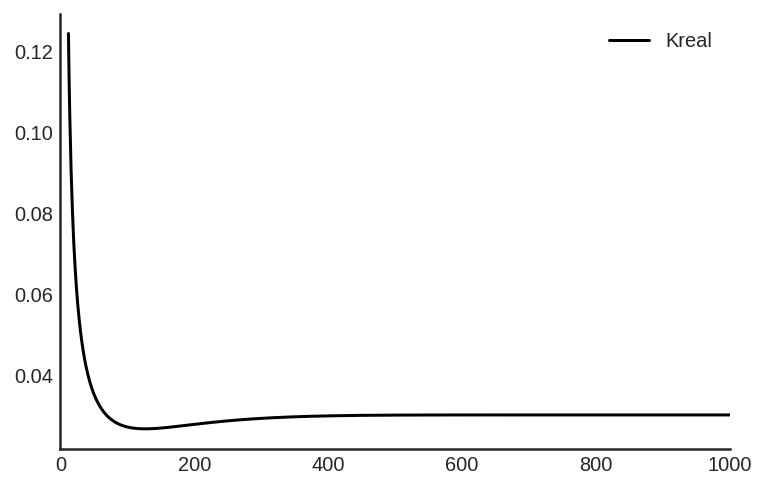

In [0]:
fig, ax = plt.subplots()

df[["Kreal"]].pct_change().rolling(12).mean().plot(ax=ax, color='black')
sns.despine()
plt.show()

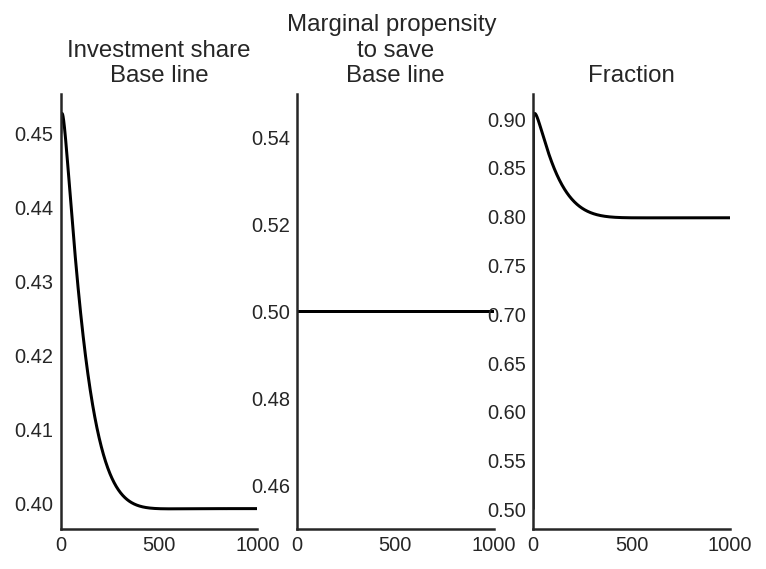

In [0]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\nBase line', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\nBase line', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

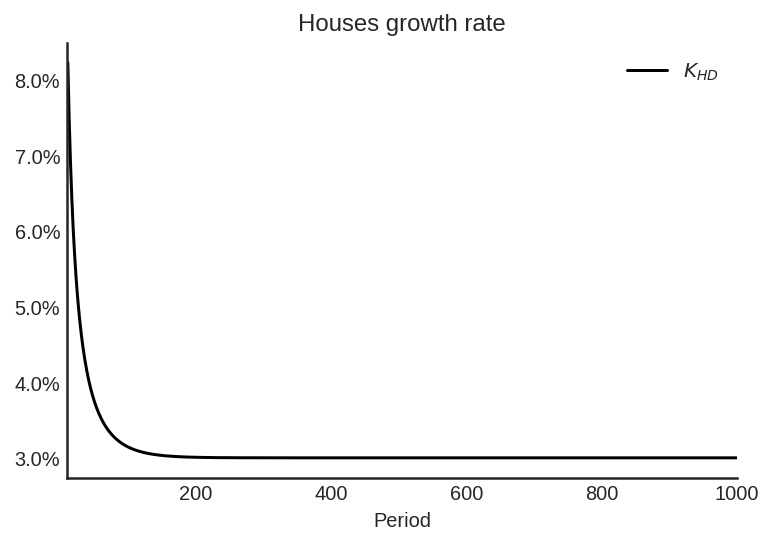

In [0]:
ax = df['K_HD'][10:].pct_change().plot(color = "black", title = "Houses growth rate", label = "$K_{HD}$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

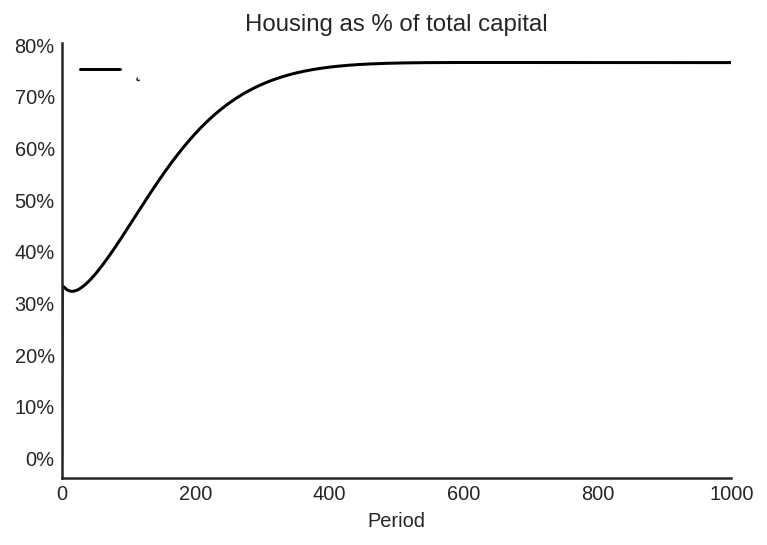

In [0]:
ax = df['k'].plot(color = "black", title = "Housing as % of total capital", label = "$\\k$", legend = True)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

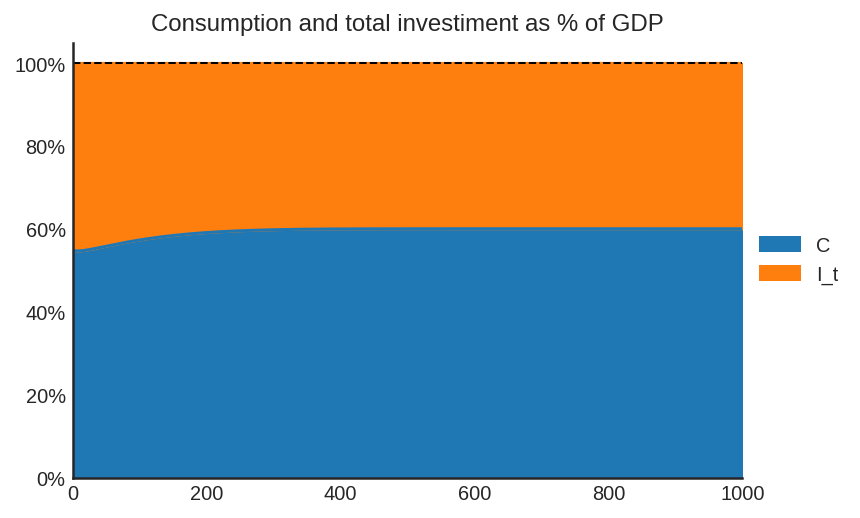

In [0]:
ax = df[['C', 'I_t']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Consumption and total investiment as % of GDP")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

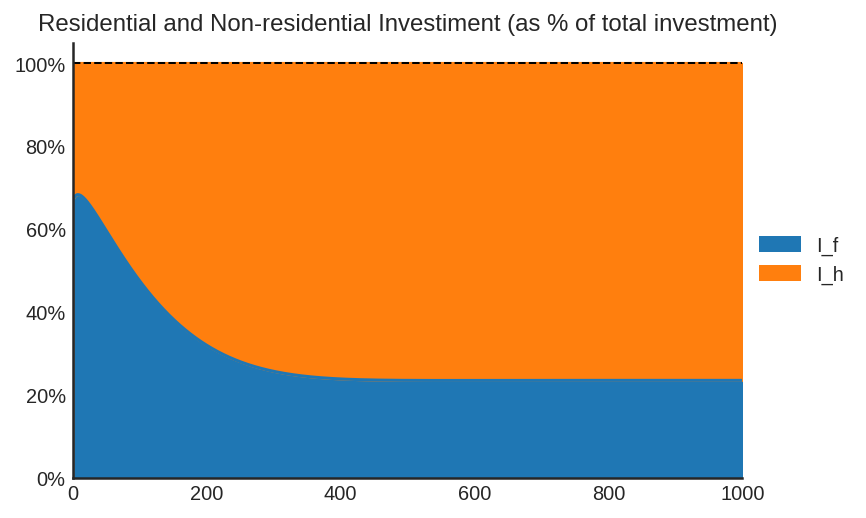

In [0]:
ax = df[['I_f', 'I_h']].apply(lambda x: x/df['I_t']).plot(kind = 'area', stacked = True, legend = True, title = "Residential and Non-residential Investiment (as % of total investment)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

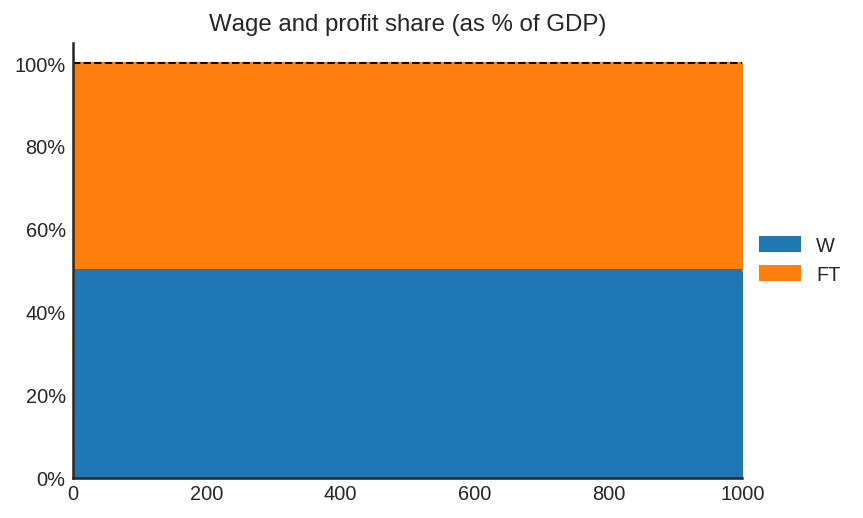

In [0]:
ax = df[['W', 'FT']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Wage and profit share (as % of GDP)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

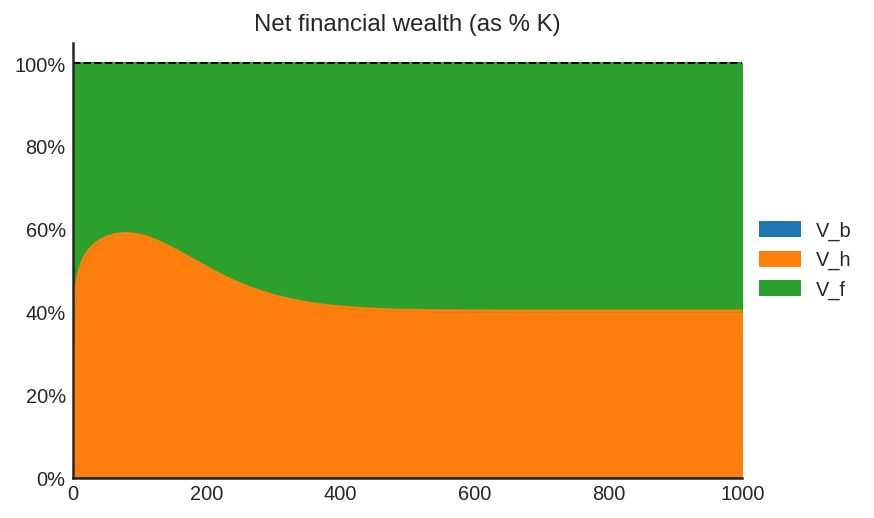

In [0]:
ax = df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, title = "Net financial wealth (as % K)")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

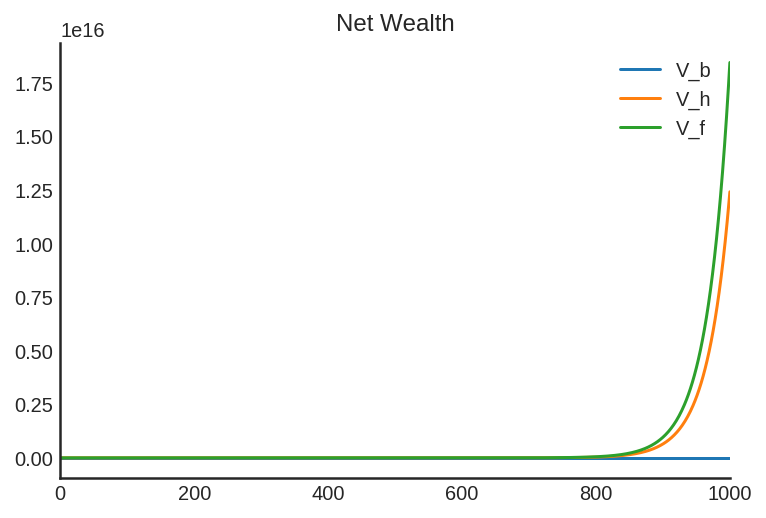

In [0]:
df[["V_b", "V_h", "V_f"]].plot(title = "Net Wealth")
sns.despine()
plt.show()

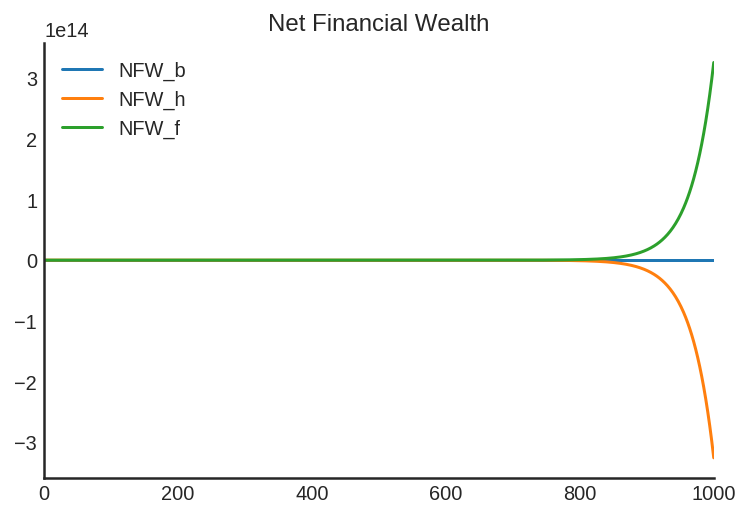

In [0]:
df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth")
sns.despine()
plt.show()

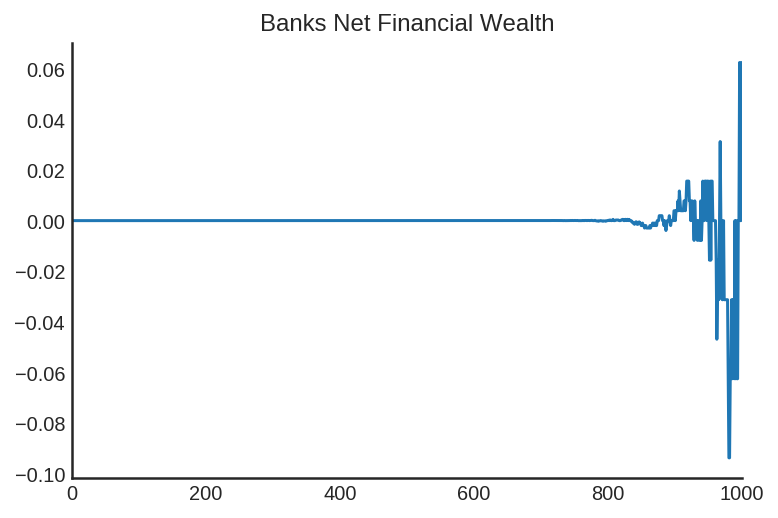

In [0]:
df['NFW_b'].plot(title = "Banks Net Financial Wealth")
sns.despine()
plt.show()

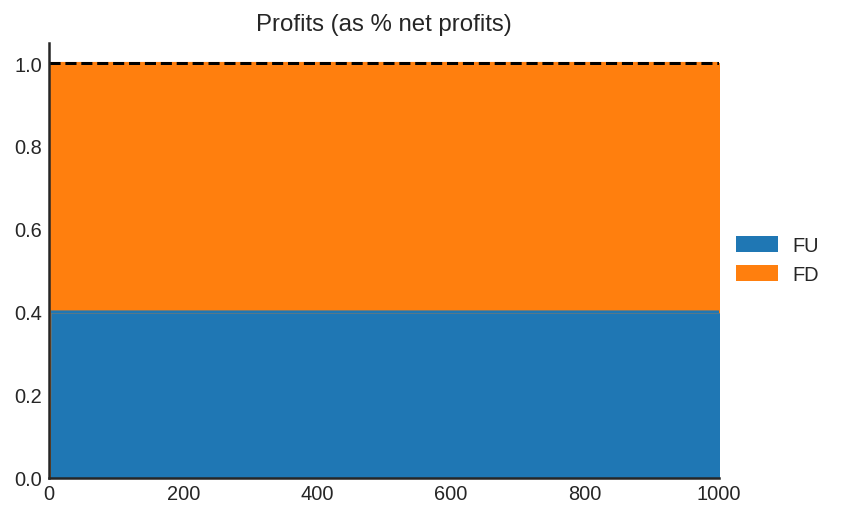

In [0]:
ax = df[["FU", "FD"]].apply(lambda x: x/df["Fn"]).plot(kind = "area", stacked = True, title = "Profits (as % net profits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "black", ls = "--")
sns.despine()
plt.show()

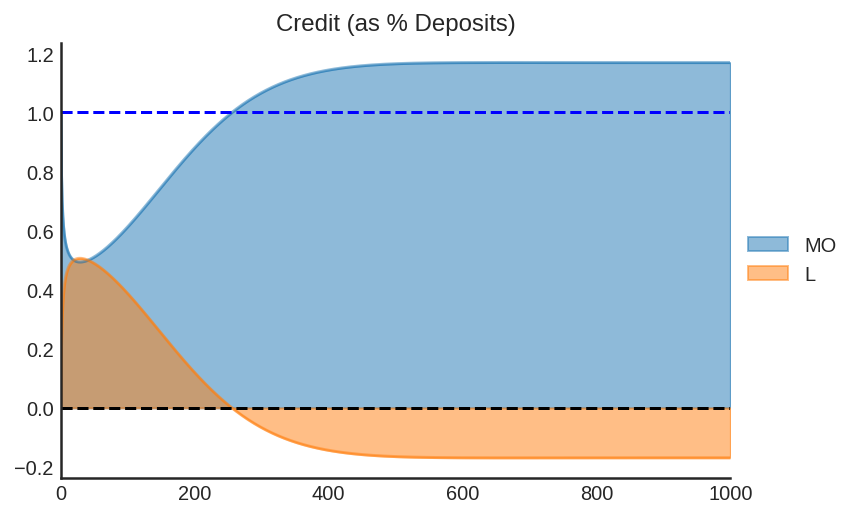

In [0]:
ax = df[["MO", "L"]].apply(lambda x: x/df["M"]).plot(kind = "area",stacked = False ,title = "Credit (as % Deposits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "blue", ls = "--")
ax.axhline(y = 0, color = "black", ls = "--")
sns.despine()
plt.show()

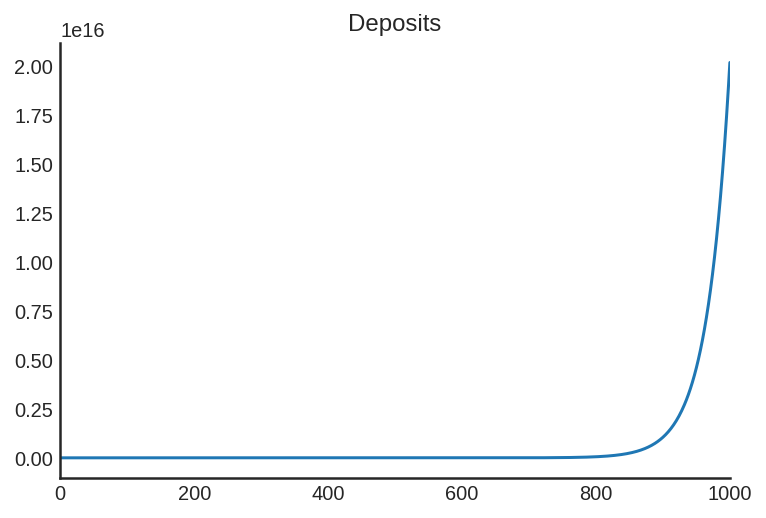

In [0]:
df["M"].plot(title = "Deposits")
sns.despine()
plt.show()

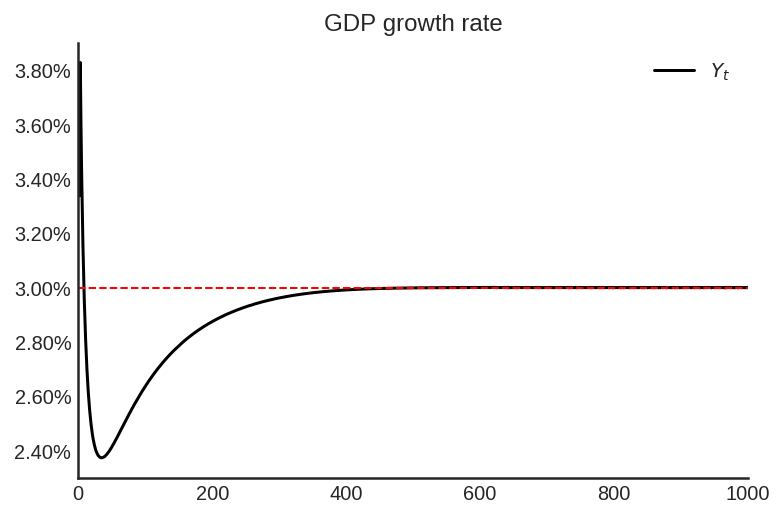

In [0]:
ax = df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
sns.despine()
plt.show()

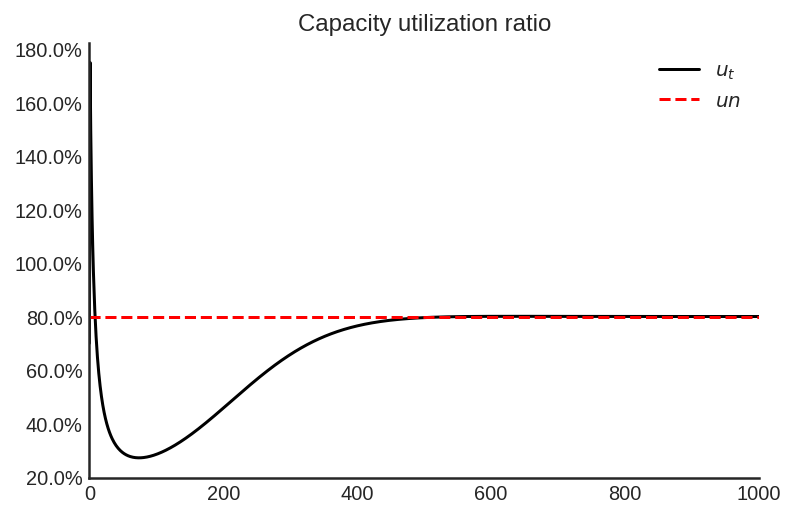

In [0]:
ax = df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax = df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

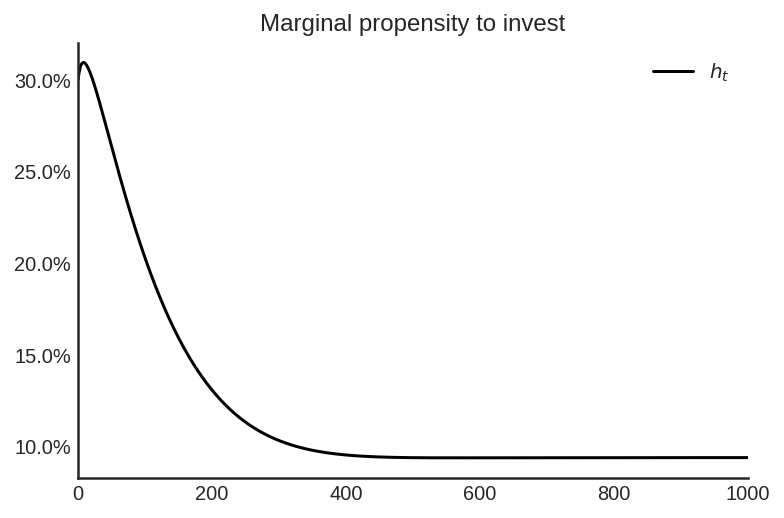

In [0]:
ax = df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", label = "$h_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

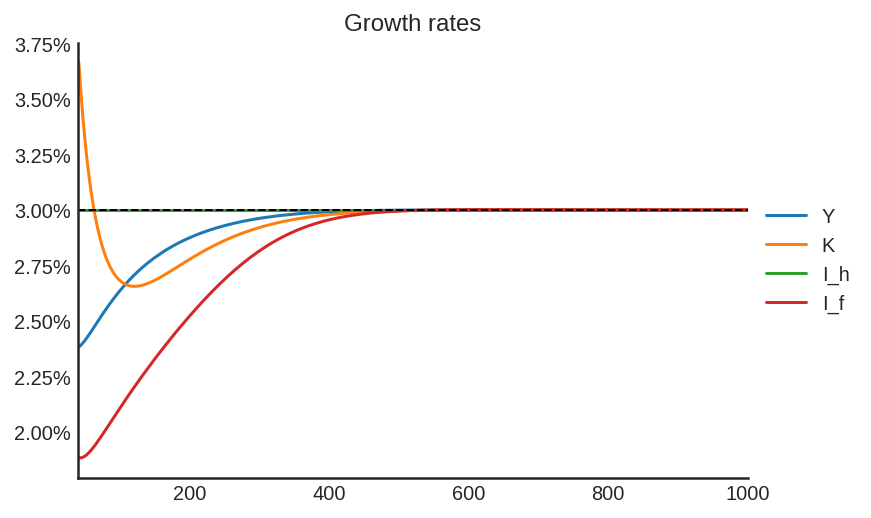

In [0]:
ax = df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

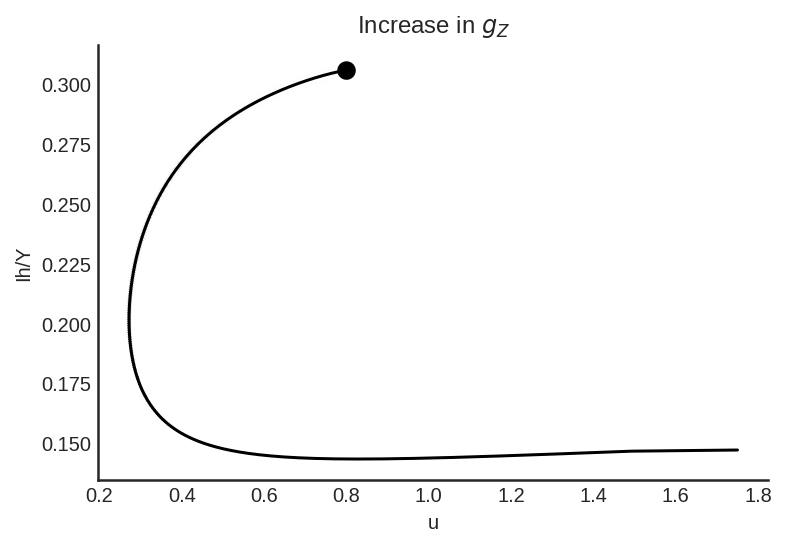

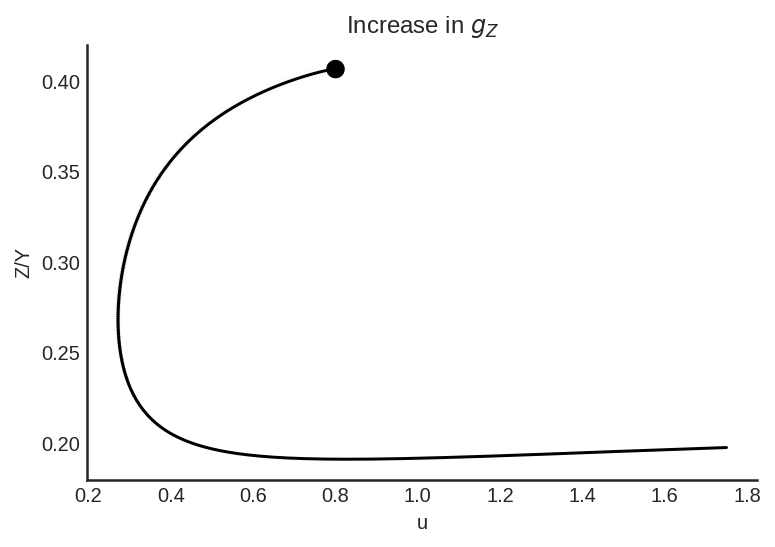

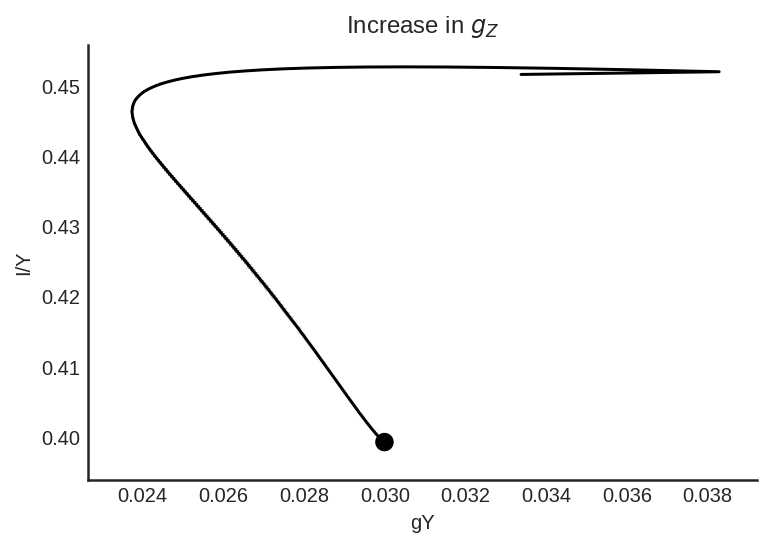

In [0]:
df["TIME"] = [i+1 for i in range(len(df.index))]
df["Ih/Y"] = df["I_h"]/df["Y"]
df["I/Y"] = df["I_t"]/df["Y"]
df["Z/Y"] = df["Z"]/df["Y"]
df["gY"] = df["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

# Shocks

## Increase in autonomous growth rate ($g_z$)

In [0]:
base = model()
df = SolveSFC(base, time=900)
shock = ShockModel(base_model=base, create_function=model(), variable='phi_0', increase=0.01, time = 1200)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
C,7.034613e+13,7.327065e+13,7.463115e+13,7.686996e+13,7.917604e+13,8.155130e+13,8.399781e+13,8.651773e+13,8.911324e+13,9.178723e+13,9.454019e+13,9.737638e+13,1.002976e+14,1.033066e+14,1.064065e+14,1.095979e+14,1.128863e+14,1.162723e+14,1.197605e+14,1.233536e+14,1.270539e+14,1.308658e+14,1.347914e+14,1.388351e+14,1.430001e+14,1.472910e+14,1.517088e+14,1.562600e+14,1.609489e+14,1.657762e+14,1.707495e+14,1.758720e+14,1.811481e+14,1.865834e+14,1.921800e+14,1.979453e+14,2.038851e+14,2.100011e+14,2.163001e+14,2.227891e+14,...,1.953793e+34,2.031945e+34,2.113223e+34,2.197752e+34,2.285662e+34,2.377088e+34,2.472183e+34,2.571072e+34,2.673910e+34,2.780857e+34,2.892091e+34,3.007775e+34,3.128086e+34,3.253209e+34,3.383345e+34,3.518671e+34,3.659418e+34,3.805795e+34,3.958026e+34,4.116371e+34,4.281001e+34,4.452251e+34,4.630331e+34,4.815575e+34,5.008189e+34,5.208493e+34,5.416833e+34,5.633506e+34,5.858859e+34,6.093213e+34,6.336928e+34,6.590405e+34,6.854021e+34,7.128182e+34,7.413309e+34,7.709842e+34,8.018235e+34,8.338965e+34,8.672523e+34,9.019424e+34
FD,4.191366e+13,4.344077e+13,4.446790e+13,4.580182e+13,4.717583e+13,4.859106e+13,5.004874e+13,5.155015e+13,5.309661e+13,5.468983e+13,5.633010e+13,5.801995e+13,5.976050e+13,6.155326e+13,6.340029e+13,6.530176e+13,6.726108e+13,6.927853e+13,7.135684e+13,7.349770e+13,7.570237e+13,7.797361e+13,8.031254e+13,8.272186e+13,8.520346e+13,8.776003e+13,9.039225e+13,9.310396e+13,9.589767e+13,9.877389e+13,1.017371e+14,1.047891e+14,1.079327e+14,1.111712e+14,1.145057e+14,1.179408e+14,1.214799e+14,1.251239e+14,1.288770e+14,1.327432e+14,...,1.083503e+34,1.126843e+34,1.171916e+34,1.218793e+34,1.267545e+34,1.318247e+34,1.370983e+34,1.425824e+34,1.482854e+34,1.542162e+34,1.603849e+34,1.668003e+34,1.734723e+34,1.804112e+34,1.876280e+34,1.951327e+34,2.029380e+34,2.110555e+34,2.194977e+34,2.282791e+34,2.374088e+34,2.469057e+34,2.567813e+34,2.670544e+34,2.777361e+34,2.888441e+34,3.003978e+34,3.124138e+34,3.249110e+34,3.379075e+34,3.514230e+34,3.654799e+34,3.800991e+34,3.953031e+34,4.111152e+34,4.275598e+34,4.446622e+34,4.624486e+34,4.809466e+34,5.001844e+34
FT,5.854575e+13,6.075163e+13,6.211213e+13,6.397537e+13,6.589461e+13,6.787143e+13,6.990755e+13,7.200475e+13,7.416488e+13,7.639041e+13,7.868148e+13,8.104190e+13,8.347313e+13,8.597731e+13,8.855740e+13,9.121328e+13,9.395019e+13,9.676813e+13,9.967115e+13,1.026616e+14,1.057411e+14,1.089137e+14,1.121807e+14,1.155461e+14,1.190124e+14,1.225836e+14,1.262602e+14,1.300480e+14,1.339505e+14,1.379679e+14,1.421069e+14,1.463701e+14,1.507611e+14,1.552848e+14,1.599424e+14,1.647407e+14,1.696843e+14,1.747743e+14,1.800165e+14,1.854170e+14,...,1.651052e+34,1.717094e+34,1.785778e+34,1.857209e+34,1.931497e+34,2.008757e+34,2.089119e+34,2.172685e+34,2.259588e+34,2.349962e+34,2.443960e+34,2.541718e+34,2.643387e+34,2.749123e+34,2.859095e+34,2.973451e+34,3.092389e+34,3.216085e+34,3.344728e+34,3.478541e+34,3.617658e+34,3.762374e+34,3.912859e+34,4.069404e+34,4.232171e+34,4.401434e+34,4.577491e+34,4.760591e+34,4.951027e+34,5.149068e+34,5.355017e+34,5.569218e+34,5.791987e+34,6.023666e+34,6.264613e+34,6.515197e+34,6.775805e+34,7.046837e+34,7.328711e+34,7.621859e+34
FU,2.794244e+13,2.896051e+13,2.964526e+13,3.053455e+13,3.145055e+13,3.239404e+13,3.336583e+13,3.436677e+13,3.539774e+13,3.645988e+13,3.755340e+13,3.867997e+13,3.984033e+13,4.103551e+13,4.226686e+13,4.353451e+13,4.484072e+13,4.618569e+13,4.757123e+13,4.899847e+13,5.046824e+13,5.198241e+13,5.354169e+13,5.514791e+13,5.680231e+13,5.850669e+13,6.026150e+13,6.206931e+13,6.393178e+13,6.584926e+13,6.782470e+13,6.985940e+13,7.195515e+13,7.411412e+13,7.633715e+13,7.862722e+13,8.098659e+13,8.341594e+13,8.591798e+13,8.849548e+13,...,7.223351e+33,7.512

In [0]:
summary = SummaryShock(shock)
summary

,0,Shock,1,2,3,t-1,t,difference
C,3.083919e+14,3.195796e+14,3.311807e+14,3.444378e+14,3.582350e+14,8.672523e+34,9.019424e+34,3.469009e+33
FD,1.837469e+14,1.904209e+14,1.973466e+14,2.049407e+14,2.128419e+14,4.809466e+34,5.001844e+34,1.923786e+33
FT,2.566601e+14,2.662959e+14,2.762985e+14,2.873603e+14,2.988744e+14,7.328711e+34,7.621859e+34,2.931484e+33
FU,1.224980e+14,1.269472e+14,1.315644e+14,1.366271e+14,1.418946e+14,3.206311e+34,3.334563e+34,1.282524e+33
Fn,3.062449e+14,3.173681e+14,3.289110e+14,3.415678e+14,3.547364e+14,8.015776e+34,8.336407e+34,3.206310e+33
I_f,4.812412e+13,4.993374e+13,5.181533e+13,5.390010e+13,5.607467e+13,1.832178e+34,1.905465e+34,7.328708e+32
I_h,1.568063e+14,1.630785e+14,1.696017e+14,1.763857e+14,1.834412e+14,4.152764e+34,4.318875e+34,1.661106e+33
I_t,2.049301e+14,2.130123e+14,2.214169e+14,2.302855e+14,2.395156e+14,5.984935e+34,6.224333e+34,2.393974e+33
Is,1.568063e+14,1.630785e+14,1.696017e+14,1.763857e+14,1.834412e+14,4.152764e+34,4.318875e+34,1.661106e+33
K,7.036032e+15,7.249045e+15,7.470462e+15,7.700747e+15,7.940263e+15,1.556085e+36,1.618329e+36,6.224339e+34


In [0]:
shock1 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta g_Z$']
shock1

,$\Delta g_Z$
alpha,1.00000
g_Z,0.04000
gamma_F,0.40000
gamma_u,0.01000
gk,0.04000
h,0.12500
infla,0.00000
inflaparam,0.00000
k,0.69387
omega,0.50000


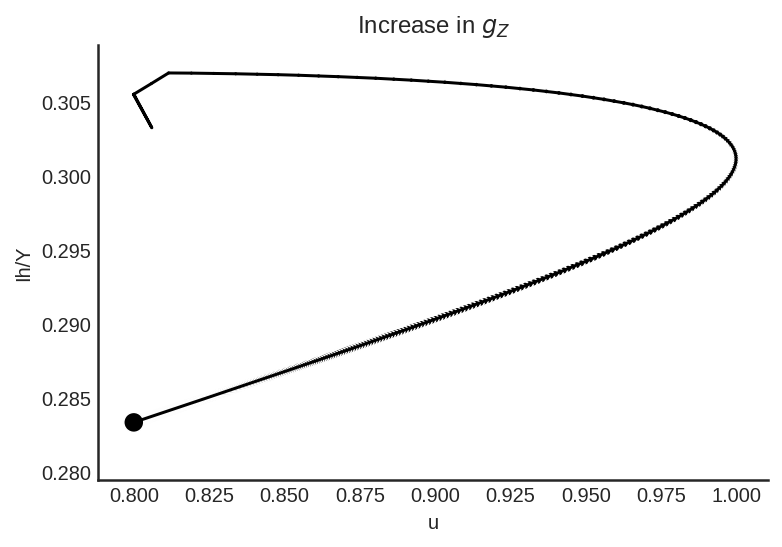

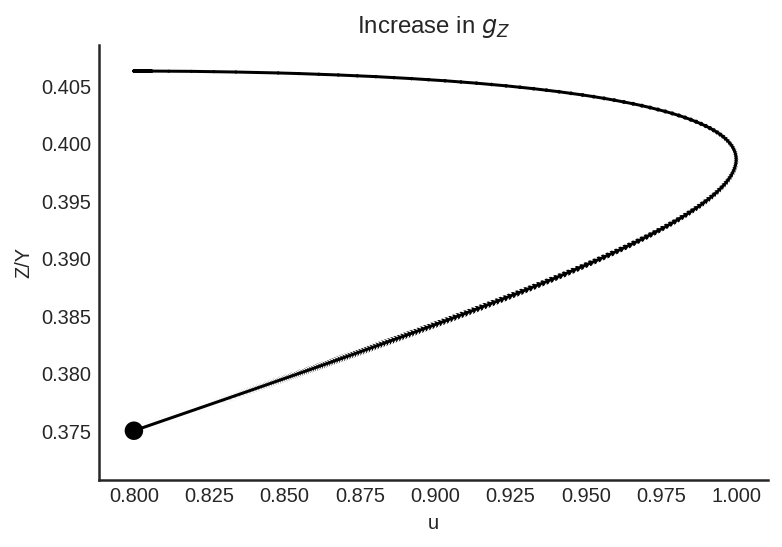

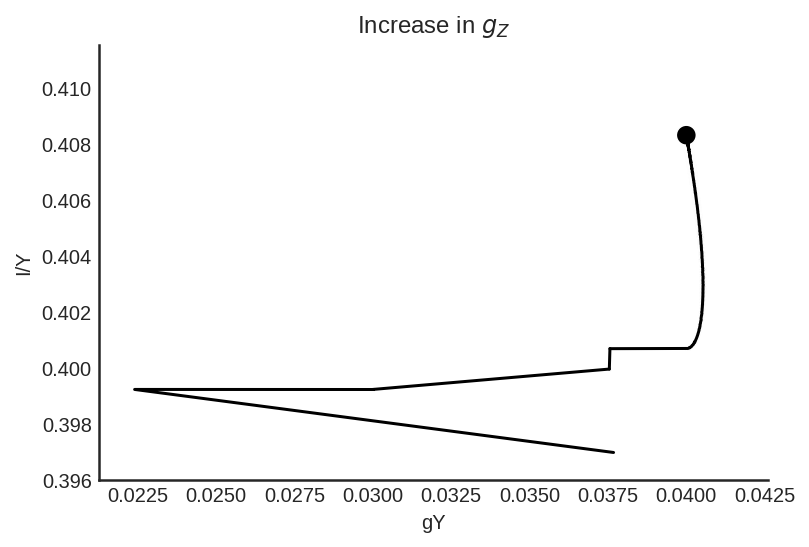

In [0]:
shock["TIME"] = [i+1 for i in range(len(shock.index))]
shock["Ih/Y"] = shock["I_h"]/shock["Y"]
shock["I/Y"] = shock["I_t"]/shock["Y"]
shock["Z/Y"] = shock["Z"]/shock["Y"]
shock["gY"] = shock["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

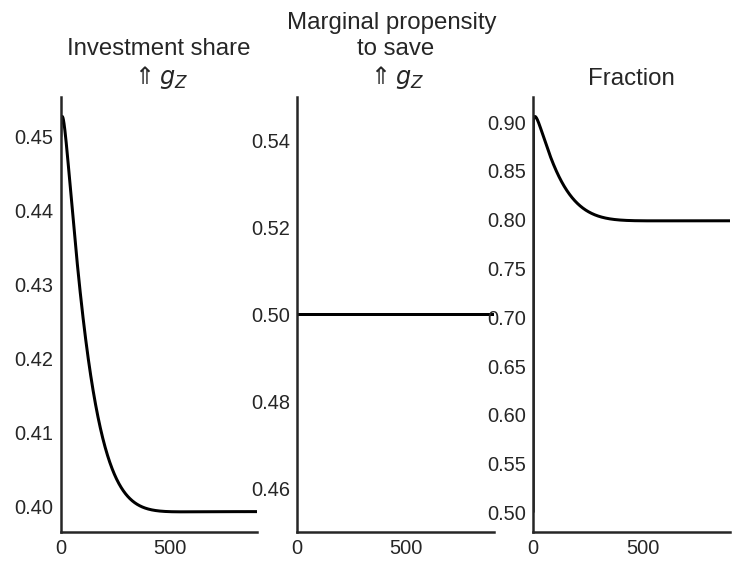

In [0]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\n$\\Uparrow g_Z$', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\n$\\Uparrow g_Z$', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

### Plots

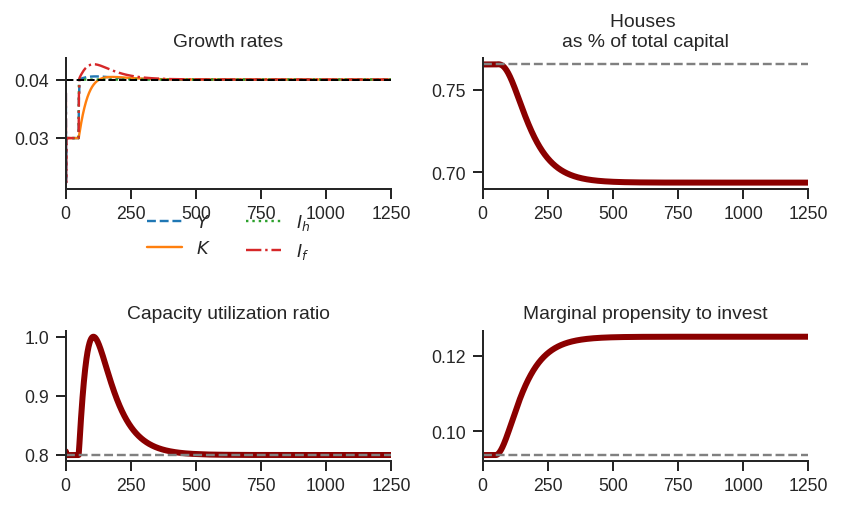

In [0]:
sns.set_context('paper')
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in autonomous growth rate ($g_z$)')
plt.show()



fig.savefig('Shock_1.png', dpi = 300)

## Increase in wage-share ($\omega$)

In [0]:
base = model()
df = SolveSFC(base, time=700)
shock = ShockModel(base_model=base, create_function=model(), variable='omegapar', increase=0.07, time = 900)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950
C,1.904417e+11,1.983606e+11,2.020430e+11,2.081037e+11,2.143475e+11,2.207775e+11,2.274023e+11,2.342249e+11,2.412500e+11,2.484876e+11,2.559431e+11,2.636208e+11,2.715296e+11,2.796779e+11,2.880661e+11,2.967083e+11,3.056098e+11,3.147782e+11,3.242218e+11,3.339486e+11,3.439673e+11,3.542891e+11,3.649153e+11,3.758630e+11,3.871414e+11,3.987559e+11,4.107164e+11,4.230401e+11,4.357308e+11,4.488029e+11,4.622673e+11,4.761374e+11,4.904185e+11,5.051313e+11,5.202870e+11,5.358944e+11,5.519715e+11,5.685310e+11,5.855872e+11,6.031552e+11,...,1.239111e+23,1.276284e+23,1.314578e+23,1.354015e+23,1.394640e+23,1.436469e+23,1.479563e+23,1.523950e+23,1.569668e+23,1.616758e+23,1.665261e+23,1.715219e+23,1.766683e+23,1.819676e+23,1.874266e+23,1.930494e+23,1.988409e+23,2.048085e+23,2.109503e+23,2.172788e+23,2.237972e+23,2.305111e+23,2.374264e+23,2.445492e+23,2.518857e+23,2.594422e+23,2.672255e+23,2.752423e+23,2.835007e+23,2.920045e+23,3.007668e+23,3.097876e+23,3.190812e+23,3.286567e+23,3.385133e+23,3.486702e+23,3.591335e+23,3.699026e+23,3.810013e+23,3.924325e+23
FD,1.134748e+11,1.176101e+11,1.203905e+11,1.240017e+11,1.277220e+11,1.315533e+11,1.355007e+11,1.395659e+11,1.437517e+11,1.480642e+11,1.525066e+11,1.570813e+11,1.617937e+11,1.666488e+11,1.716468e+11,1.767962e+11,1.821000e+11,1.875630e+11,1.931899e+11,1.989855e+11,2.049550e+11,2.111052e+11,2.174367e+11,2.239598e+11,2.306799e+11,2.376003e+11,2.447268e+11,2.520698e+11,2.596314e+11,2.674203e+11,2.754429e+11,2.837072e+11,2.922164e+11,3.009829e+11,3.100132e+11,3.193127e+11,3.288920e+11,3.387587e+11,3.489215e+11,3.593891e+11,...,5.702016e+22,5.873077e+22,6.049294e+22,6.230773e+22,6.417715e+22,6.610200e+22,6.808506e+22,7.012761e+22,7.223143e+22,7.439838e+22,7.663033e+22,7.892923e+22,8.129745e+22,8.373602e+22,8.624810e+22,8.883555e+22,9.150061e+22,9.424673e+22,9.707300e+22,9.998519e+22,1.029847e+23,1.060743e+23,1.092565e+23,1.125342e+23,1.159102e+23,1.193875e+23,1.229692e+23,1.266582e+23,1.304585e+23,1.343717e+23,1.384039e+23,1.425550e+23,1.468316e+23,1.512379e+23,1.557737e+23,1.604475e+23,1.652624e+23,1.702181e+23,1.753254e+23,1.805857e+23
FT,1.584932e+11,1.644664e+11,1.681488e+11,1.731926e+11,1.783892e+11,1.837403e+11,1.892540e+11,1.949322e+11,2.007785e+11,2.068020e+11,2.130070e+11,2.193966e+11,2.259787e+11,2.327604e+11,2.397411e+11,2.469335e+11,2.543417e+11,2.619722e+11,2.698315e+11,2.779267e+11,2.862647e+11,2.948554e+11,3.036987e+11,3.128098e+11,3.221966e+11,3.318628e+11,3.418165e+11,3.520732e+11,3.626348e+11,3.735141e+11,3.847198e+11,3.962635e+11,4.081484e+11,4.203931e+11,4.330067e+11,4.459957e+11,4.593758e+11,4.731574e+11,4.873524e+11,5.019733e+11,...,8.154358e+22,8.398989e+22,8.651001e+22,8.910531e+22,9.177878e+22,9.453136e+22,9.736730e+22,1.002883e+23,1.032970e+23,1.063959e+23,1.095878e+23,1.128754e+23,1.162622e+23,1.197495e+23,1.233420e+23,1.270422e+23,1.308535e+23,1.347809e+23,1.388225e+23,1.429872e+23,1.472768e+23,1.516951e+23,1.562459e+23,1.609333e+23,1.657613e+23,1.707342e+23,1.758562e+23,1.811319e+23,1.865667e+23,1.921628e+23,1.979293e+23,2.038655e+23,2.099815e+23,2.162832e+23,2.227694e+23,2.294536e+23,2.363396e+23,2.434261e+23,2.507301e+23,2.582529e+23
FU,7.564986e+10,7.840671e+10,8.026031e+10,8.266778e+10,8.514803e+10,8.770219e+10,9.033377e+10,9.304393e+10,9.583448e+10,9.870949e+10,1.016710e+11,1.047208e+11,1.078624e+11,1.110992e+11,1.144312e+11,1.178641e+11,1.214000e+11,1.250420e+11,1.287932e+11,1.326570e+11,1.366367e+11,1.407368e+11,1.449578e+11,1.493065e+11,1.537866e+11,1.584002e+11,1.631512e+11,1.680465e+11,1.730876e+11,1.782802e+11,1.836286e+11,1.891381e+11,1.948110e+11,2.006553e+11,2.066755e+11,2.128751e+11,2.192613e+11,2.258392e+11,2.326143e+11,2.395927e+11,...,3.801344e+22,3.915384e+22,4.032863e+22,4.153849e+22,4.2784

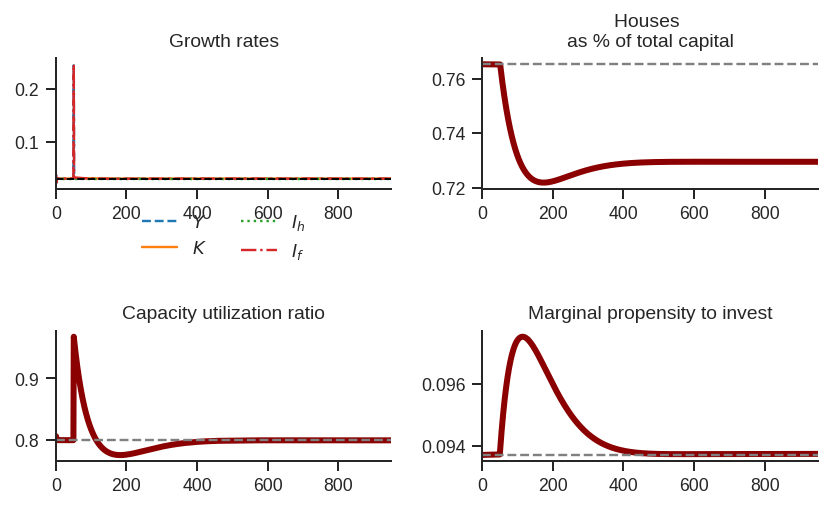

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in wage-share ($\omega$)')
plt.show()



fig.savefig('Shock_2.png', dpi = 300)

In [0]:
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']
shock2

,$\Delta \omega$
alpha,1.000
g_Z,0.030
gamma_F,0.400
gamma_u,0.010
gk,0.030
h,0.094
infla,0.000
inflaparam,0.000
k,0.730
omega,0.570


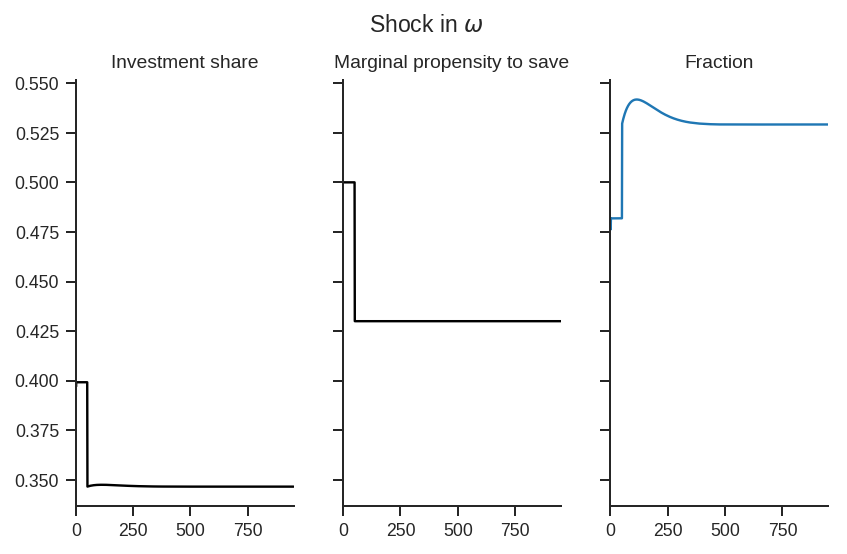

In [0]:
fig, ax = plt.subplots(1,3, sharey=True)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_f']/(shock['I_f'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $\omega$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

## Increase in interest rates

In [0]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='spread_mo', increase=0.005, time = 1000)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050
C,1.351960e+15,1.408165e+15,1.434315e+15,1.477339e+15,1.521663e+15,1.567315e+15,1.614326e+15,1.662756e+15,1.712638e+15,1.764017e+15,1.816942e+15,1.871444e+15,1.927596e+15,1.985423e+15,2.044976e+15,2.106325e+15,2.169514e+15,2.234599e+15,2.301636e+15,2.370692e+15,2.441816e+15,2.515059e+15,2.590510e+15,2.668225e+15,2.748271e+15,2.830726e+15,2.915639e+15,3.003108e+15,3.093200e+15,3.186021e+15,3.281597e+15,3.380022e+15,3.481422e+15,3.585864e+15,3.693450e+15,3.804264e+15,3.918369e+15,4.035919e+15,4.157015e+15,4.281725e+15,...,1.227684e+27,1.261445e+27,1.296135e+27,1.331779e+27,1.368409e+27,1.406034e+27,1.444703e+27,1.484429e+27,1.525251e+27,1.567195e+27,1.610293e+27,1.654576e+27,1.700080e+27,1.746833e+27,1.794867e+27,1.844235e+27,1.894942e+27,1.947053e+27,2.000603e+27,2.055613e+27,2.112142e+27,2.170235e+27,2.229908e+27,2.291230e+27,2.354239e+27,2.418985e+27,2.485507e+27,2.553854e+27,2.624085e+27,2.696247e+27,2.770399e+27,2.846580e+27,2.924866e+27,3.005307e+27,3.087940e+27,3.172858e+27,3.260112e+27,3.349782e+27,3.441883e+27,3.536535e+27
FD,8.055214e+14,8.348704e+14,8.546123e+14,8.802465e+14,9.066556e+14,9.338561e+14,9.618663e+14,9.907214e+14,1.020442e+15,1.051054e+15,1.082588e+15,1.115062e+15,1.148518e+15,1.182973e+15,1.218455e+15,1.255008e+15,1.292657e+15,1.331436e+15,1.371378e+15,1.412523e+15,1.454900e+15,1.498539e+15,1.543494e+15,1.589798e+15,1.637491e+15,1.686620e+15,1.737212e+15,1.789328e+15,1.843006e+15,1.898311e+15,1.955257e+15,2.013900e+15,2.074316e+15,2.136544e+15,2.200646e+15,2.266671e+15,2.334657e+15,2.404695e+15,2.476847e+15,2.551151e+15,...,7.535810e+26,7.743045e+26,7.955978e+26,8.174768e+26,8.399612e+26,8.630562e+26,8.867920e+26,9.111770e+26,9.362343e+26,9.619808e+26,9.884352e+26,1.015617e+27,1.043549e+27,1.072246e+27,1.101731e+27,1.132034e+27,1.163159e+27,1.195146e+27,1.228017e+27,1.261783e+27,1.296482e+27,1.332141e+27,1.368769e+27,1.406410e+27,1.445087e+27,1.484829e+27,1.525662e+27,1.567615e+27,1.610724e+27,1.655019e+27,1.700535e+27,1.747297e+27,1.795351e+27,1.844727e+27,1.895449e+27,1.947574e+27,2.001132e+27,2.056174e+27,2.112708e+27,2.170807e+27
FT,1.125172e+15,1.167567e+15,1.193717e+15,1.229522e+15,1.266412e+15,1.304407e+15,1.343531e+15,1.383836e+15,1.425351e+15,1.468111e+15,1.512159e+15,1.557518e+15,1.604252e+15,1.652379e+15,1.701940e+15,1.752998e+15,1.805587e+15,1.859754e+15,1.915547e+15,1.973019e+15,2.032214e+15,2.093168e+15,2.155962e+15,2.220641e+15,2.287259e+15,2.355885e+15,2.426552e+15,2.499348e+15,2.574328e+15,2.651582e+15,2.731125e+15,2.813036e+15,2.897426e+15,2.984349e+15,3.073889e+15,3.166117e+15,3.261077e+15,3.358908e+15,3.459694e+15,3.563485e+15,...,1.017824e+27,1.045814e+27,1.074574e+27,1.104125e+27,1.134495e+27,1.165687e+27,1.197746e+27,1.230681e+27,1.264525e+27,1.299299e+27,1.335030e+27,1.371743e+27,1.409470e+27,1.448230e+27,1.488053e+27,1.528983e+27,1.571021e+27,1.614224e+27,1.658622e+27,1.704227e+27,1.751093e+27,1.799258e+27,1.848728e+27,1.899568e+27,1.951806e+27,2.005486e+27,2.060636e+27,2.117299e+27,2.175524e+27,2.235351e+27,2.296829e+27,2.359986e+27,2.424892e+27,2.491583e+27,2.560088e+27,2.630491e+27,2.702829e+27,2.777174e+27,2.853529e+27,2.932001e+27
FU,5.370143e+14,5.565803e+14,5.697415e+14,5.868310e+14,6.044370e+14,6.225707e+14,6.412442e+14,6.604809e+14,6.802948e+14,7.007030e+14,7.217255e+14,7.433746e+14,7.656788e+14,7.886486e+14,8.123036e+14,8.366720e+14,8.617716e+14,8.876241e+14,9.142521e+14,9.416818e+14,9.699334e+14,9.990261e+14,1.028996e+15,1.059865e+15,1.091661e+15,1.124413e+15,1.158142e+15,1.192885e+15,1.228671e+15,1.265540e+15,1.303504e+15,1.342600e+15,1.382877e+15,1.424363e+15,1.467097e+15,1.511114e+15,1.556438e+15,1.603130e+15,1.651231e+15,1.700767e+15,...,5.023873e+26,5.162

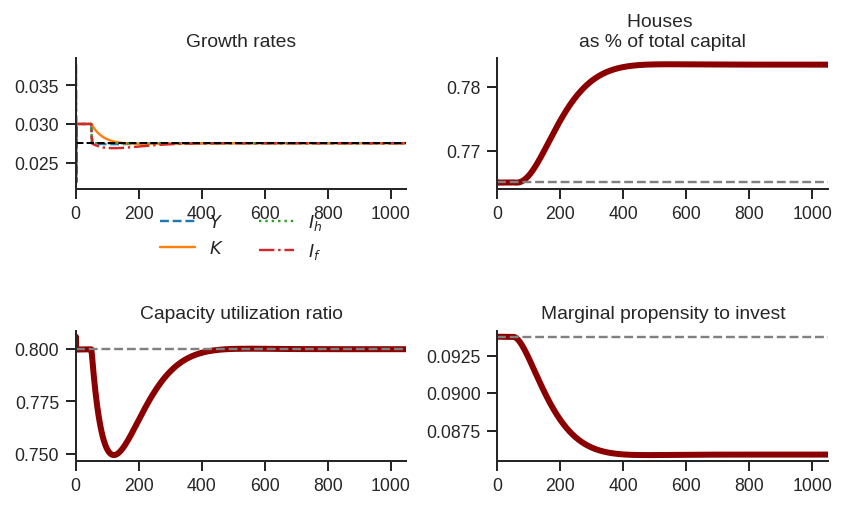

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )

ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")

sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in interest rates')
plt.show()

fig.savefig('Shock_3.png', dpi = 300)

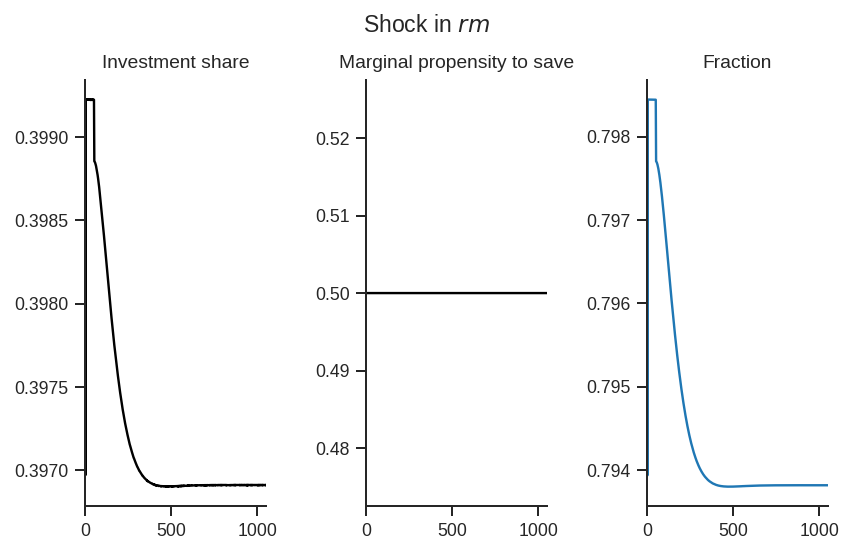

In [0]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $rm$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [0]:
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
shock3

,$\Delta rm$
alpha,1.000
g_Z,0.028
gamma_F,0.400
gamma_u,0.010
gk,0.027
h,0.086
infla,0.000
inflaparam,0.000
k,0.783
omega,0.500


## Increase in inflation

In [0]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='inflaparam', increase=0.0005, time = 500)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550
C,1.351960e+15,1.408165e+15,1.434315e+15,1.477339e+15,1.521663e+15,1.567315e+15,1.614326e+15,1.662756e+15,1.712638e+15,1.764017e+15,1.816942e+15,1.871444e+15,1.927596e+15,1.985423e+15,2.044976e+15,2.106325e+15,2.169514e+15,2.234599e+15,2.301636e+15,2.370692e+15,2.441816e+15,2.515059e+15,2.590510e+15,2.668225e+15,2.748271e+15,2.830726e+15,2.915639e+15,3.003108e+15,3.093200e+15,3.186021e+15,3.281597e+15,3.380022e+15,3.481422e+15,3.585864e+15,3.693450e+15,3.804264e+15,3.918369e+15,4.035919e+15,4.157015e+15,4.281725e+15,...,5.507480e+21,5.674115e+21,5.845798e+21,6.022657e+21,6.204825e+21,6.392552e+21,6.585977e+21,6.785248e+21,6.990501e+21,7.202032e+21,7.419893e+21,7.644403e+21,7.875725e+21,8.113977e+21,8.359424e+21,8.612337e+21,8.872902e+21,9.141407e+21,9.417921e+21,9.702859e+21,9.996418e+21,1.029886e+22,1.061045e+22,1.093147e+22,1.126220e+22,1.160293e+22,1.195398e+22,1.231564e+22,1.268825e+22,1.307213e+22,1.346771e+22,1.387513e+22,1.429492e+22,1.472737e+22,1.517294e+22,1.563204e+22,1.610494e+22,1.659220e+22,1.709419e+22,1.761137e+22
FD,8.055214e+14,8.348704e+14,8.546123e+14,8.802465e+14,9.066556e+14,9.338561e+14,9.618663e+14,9.907214e+14,1.020442e+15,1.051054e+15,1.082588e+15,1.115062e+15,1.148518e+15,1.182973e+15,1.218455e+15,1.255008e+15,1.292657e+15,1.331436e+15,1.371378e+15,1.412523e+15,1.454900e+15,1.498539e+15,1.543494e+15,1.589798e+15,1.637491e+15,1.686620e+15,1.737212e+15,1.789328e+15,1.843006e+15,1.898311e+15,1.955257e+15,2.013900e+15,2.074316e+15,2.136544e+15,2.200646e+15,2.266671e+15,2.334657e+15,2.404695e+15,2.476847e+15,2.551151e+15,...,3.272719e+21,3.371739e+21,3.473759e+21,3.578853e+21,3.687103e+21,3.798656e+21,3.913595e+21,4.032008e+21,4.153975e+21,4.279674e+21,4.409133e+21,4.542544e+21,4.680002e+21,4.821579e+21,4.967430e+21,5.117719e+21,5.272555e+21,5.432108e+21,5.596421e+21,5.765740e+21,5.940181e+21,6.119900e+21,6.305056e+21,6.495814e+21,6.692344e+21,6.894819e+21,7.103421e+21,7.318333e+21,7.539748e+21,7.767862e+21,8.002926e+21,8.245027e+21,8.494479e+21,8.751452e+21,9.016226e+21,9.289038e+21,9.570047e+21,9.859587e+21,1.015789e+22,1.046521e+22
FT,1.125172e+15,1.167567e+15,1.193717e+15,1.229522e+15,1.266412e+15,1.304407e+15,1.343531e+15,1.383836e+15,1.425351e+15,1.468111e+15,1.512159e+15,1.557518e+15,1.604252e+15,1.652379e+15,1.701940e+15,1.752998e+15,1.805587e+15,1.859754e+15,1.915547e+15,1.973019e+15,2.032214e+15,2.093168e+15,2.155962e+15,2.220641e+15,2.287259e+15,2.355885e+15,2.426552e+15,2.499348e+15,2.574328e+15,2.651582e+15,2.731125e+15,2.813036e+15,2.897426e+15,2.984349e+15,3.073889e+15,3.166117e+15,3.261077e+15,3.358908e+15,3.459694e+15,3.563485e+15,...,4.585417e+21,4.724155e+21,4.867097e+21,5.014345e+21,5.166007e+21,5.322304e+21,5.483349e+21,5.649260e+21,5.820144e+21,5.996267e+21,6.177647e+21,6.364574e+21,6.557174e+21,6.755534e+21,6.959881e+21,7.170451e+21,7.387392e+21,7.610953e+21,7.841164e+21,8.078397e+21,8.322808e+21,8.574613e+21,8.834037e+21,9.101309e+21,9.376668e+21,9.660358e+21,9.952631e+21,1.025375e+22,1.056397e+22,1.088358e+22,1.121295e+22,1.155215e+22,1.190166e+22,1.226170e+22,1.263267e+22,1.301492e+22,1.340864e+22,1.381431e+22,1.423226e+22,1.466286e+22
FU,5.370143e+14,5.565803e+14,5.697415e+14,5.868310e+14,6.044370e+14,6.225707e+14,6.412442e+14,6.604809e+14,6.802948e+14,7.007030e+14,7.217255e+14,7.433746e+14,7.656788e+14,7.886486e+14,8.123036e+14,8.366720e+14,8.617716e+14,8.876241e+14,9.142521e+14,9.416818e+14,9.699334e+14,9.990261e+14,1.028996e+15,1.059865e+15,1.091661e+15,1.124413e+15,1.158142e+15,1.192885e+15,1.228671e+15,1.265540e+15,1.303504e+15,1.342600e+15,1.382877e+15,1.424363e+15,1.467097e+15,1.511114e+15,1.556438e+15,1.603130e+15,1.651231e+15,1.700767e+15,...,2.181813e+21,2.247826e+21,2.315839e+21,2.385902e+21,2.4580

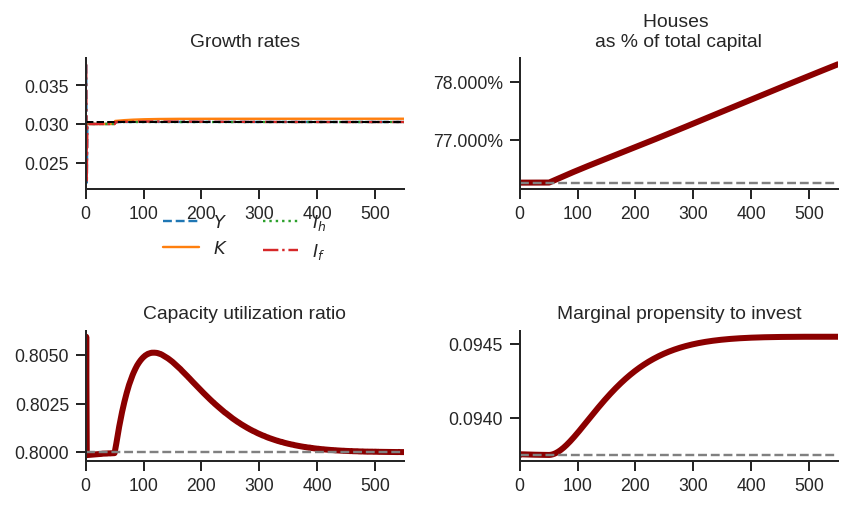

In [0]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["Kreal"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )

ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")

sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in interest rates')
plt.show()

fig.savefig('Shock_4.png', dpi = 300)

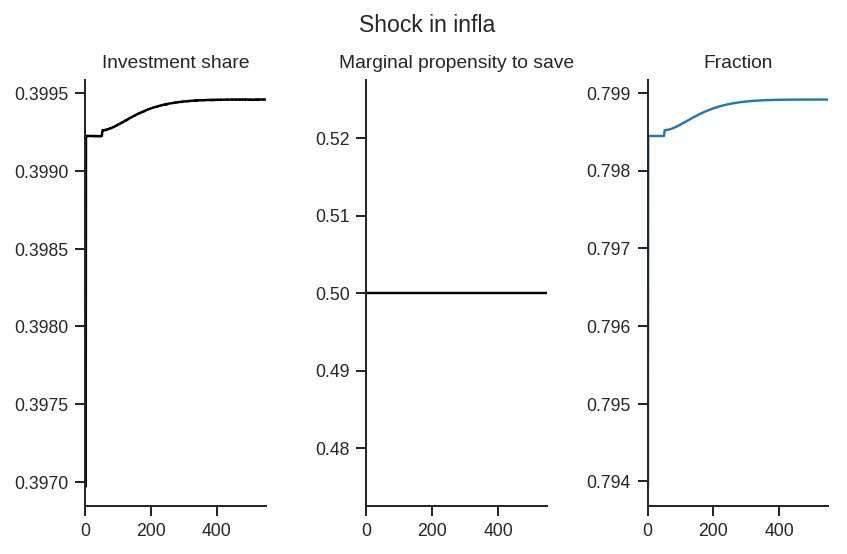

In [0]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in infla')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [0]:
shock4 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock4.columns = ['$\Delta $ Infla']
shock4

,$\Delta $ Infla
alpha,1.000
g_Z,0.030
gamma_F,0.400
gamma_u,0.010
gk,0.030
h,0.095
infla,0.000
inflaparam,0.000
k,0.806
omega,0.500


# Shock yourself

In [0]:
df_ = SolveSFC(base, time=1000)

@interact(variable = df_.transpose().loc['alpha':,:].index, increase = (-1,1,0.01))
def shock_yourself(variable, increase):
  shock = ShockModel(base_model = base, create_function = model(), variable = variable, increase = increase)
  fig, ax = plt.subplots(2,2)

  shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('--'),
                                                    )
  shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-'),
                                                    )
  shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = (':'),
                                                    )
  shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-.'),
                                                    )
  sns.set_context('paper')

  ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
  #ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
  ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
                 labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
            fancybox=True, shadow=True, ncol=2)
  
  shock['k'].plot(color = "darkred", title = "Housing \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
  ax[0,1].axhline(y = df_['k'].iloc[-1], ls ='--', color = "gray")
  #ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


  shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
  ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
  #ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

  shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
  ax[1,1].axhline(y = df_['h'].iloc[-1], ls ='--', color = "gray")
  
  sns.despine()
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  fig.suptitle('$\Delta$ {} = {}'.format(variable, increase))
  plt.show()



interactive(children=(Dropdown(description='variable', options=('alpha', 'g_Z', 'gamma_F', 'gamma_u', 'gk', 'h…

# Merging tables

In [0]:
df = df.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']
df

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock4, left_index = True, right_index = True)
table.to_latex("table.tex", bold_rows = True, column_format = 'c', decimal = ',')
table

,Base scenario,$\Delta g_Z$,$\Delta \omega$,$\Delta rm$,$\Delta $ Infla
alpha,1.000,1.00000,1.000,1.000,1.000
g_Z,0.030,0.04000,0.030,0.028,0.030
gamma_F,0.400,0.40000,0.400,0.400,0.400
gamma_u,0.010,0.01000,0.010,0.010,0.010
gk,0.030,0.04000,0.030,0.027,0.030
h,0.094,0.12500,0.094,0.086,0.095
infla,0.000,0.00000,0.000,0.000,0.000
inflaparam,0.000,0.00000,0.000,0.000,0.000
k,0.765,0.69387,0.730,0.783,0.806
omega,0.500,0.50000,0.570,0.500,0.500


# Sobol

In [0]:
t2 = datetime.now()

In [0]:
import numpy as np
sobol = model()
bound = [i/100 for i in range(1,101)]
parameters = [i for i in sobol.parameters]
time, skip = 10, 10
df_sensibility = pd.DataFrame()

################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                gamma_F = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\gamma_F$"] = empty_list ################### Replace here
############################### End #####################################################

df_sensibility.index = df_sensibility.index/100
df_sensibility.head()

,$\gamma_F$
0.00,4.513449
0.01,4.513449
0.02,4.513449
0.03,4.513449
0.04,4.513449


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                alpha = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\\alpha$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$
0.00,4.513449,3.294315
0.01,4.513449,3.301212
0.02,4.513449,3.308158
0.03,4.513449,3.315156
0.04,4.513449,3.322206


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                omegapar = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\omega$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$
0.00,4.513449,3.294315,3.301197
0.01,4.513449,3.301212,3.315156
0.02,4.513449,3.308158,3.329308
0.03,4.513449,3.315156,3.343666
0.04,4.513449,3.322206,3.358257


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                gamma_u = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\gamma_u$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$
0.00,4.513449,3.294315,3.301197,4.513459
0.01,4.513449,3.301212,3.315156,4.347378
0.02,4.513449,3.308158,3.329308,4.061666
0.03,4.513449,3.315156,3.343666,3.398189
0.04,4.513449,3.322206,3.358257,3.648004


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                rm = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$rm$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$
0.00,4.513449,3.294315,3.301197,4.513459,4.773658
0.01,4.513449,3.301212,3.315156,4.347378,4.513459
0.02,4.513449,3.308158,3.329308,4.061666,4.211163
0.03,4.513449,3.315156,3.343666,3.398189,3.841707
0.04,4.513449,3.322206,3.358257,3.648004,3.347905


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                Theta = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\Theta$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$
0.00,4.513449,3.294315,3.301197,4.513459,4.773658,4.192697
0.01,4.513449,3.301212,3.315156,4.347378,4.513459,4.203496
0.02,4.513449,3.308158,3.329308,4.061666,4.211163,4.214202
0.03,4.513449,3.315156,3.343666,3.398189,3.841707,4.224807
0.04,4.513449,3.322206,3.358257,3.648004,3.347905,4.235317


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phi_0 = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\phi_0$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$
0.00,4.513449,3.294315,3.301197,4.513459,4.773658,4.192697,2.550020
0.01,4.513449,3.301212,3.315156,4.347378,4.513459,4.203496,2.540458
0.02,4.513449,3.308158,3.329308,4.061666,4.211163,4.214202,3.841730
0.03,4.513449,3.315156,3.343666,3.398189,3.841707,4.224807,4.513459
0.04,4.513449,3.322206,3.358257,3.648004,3.347905,4.235317,5.004969


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phi_1 = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\phi_1$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$
0.00,4.513449,3.294315,3.301197,4.513459,4.773658,4.192697,2.550020,4.996162
0.01,4.513449,3.301212,3.315156,4.347378,4.513459,4.203496,2.540458,4.987320
0.02,4.513449,3.308158,3.329308,4.061666,4.211163,4.214202,3.841730,4.978445
0.03,4.513449,3.315156,3.343666,3.398189,3.841707,4.224807,4.513459,4.969535
0.04,4.513449,3.322206,3.358257,3.648004,3.347905,4.235317,5.004969,4.960590


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phparam = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\\xi$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$,$\xi$
0.00,4.513449,3.294315,3.301197,4.513459,4.773658,4.192697,2.550020,4.996162,4.513459
0.01,4.513449,3.301212,3.315156,4.347378,4.513459,4.203496,2.540458,4.987320,4.513459
0.02,4.513449,3.308158,3.329308,4.061666,4.211163,4.214202,3.841730,4.978445,4.513459
0.03,4.513449,3.315156,3.343666,3.398189,3.841707,4.224807,4.513459,4.969535,4.513459
0.04,4.513449,3.322206,3.358257,3.648004,3.347905,4.235317,5.004969,4.960590,4.513459


In [0]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                infla = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["infla"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$,$\xi$,infla
0.00,4.513449,3.294315,3.301197,4.513459,4.773658,4.192697,2.550020,4.996162,4.513459,4.776073
0.01,4.513449,3.301212,3.315156,4.347378,4.513459,4.203496,2.540458,4.987320,4.513459,5.004969
0.02,4.513449,3.308158,3.329308,4.061666,4.211163,4.214202,3.841730,4.978445,4.513459,5.209368
0.03,4.513449,3.315156,3.343666,3.398189,3.841707,4.224807,4.513459,4.969535,4.513459,5.395061
0.04,4.513449,3.322206,3.358257,3.648004,3.347905,4.235317,5.004969,4.960590,4.513459,5.565929


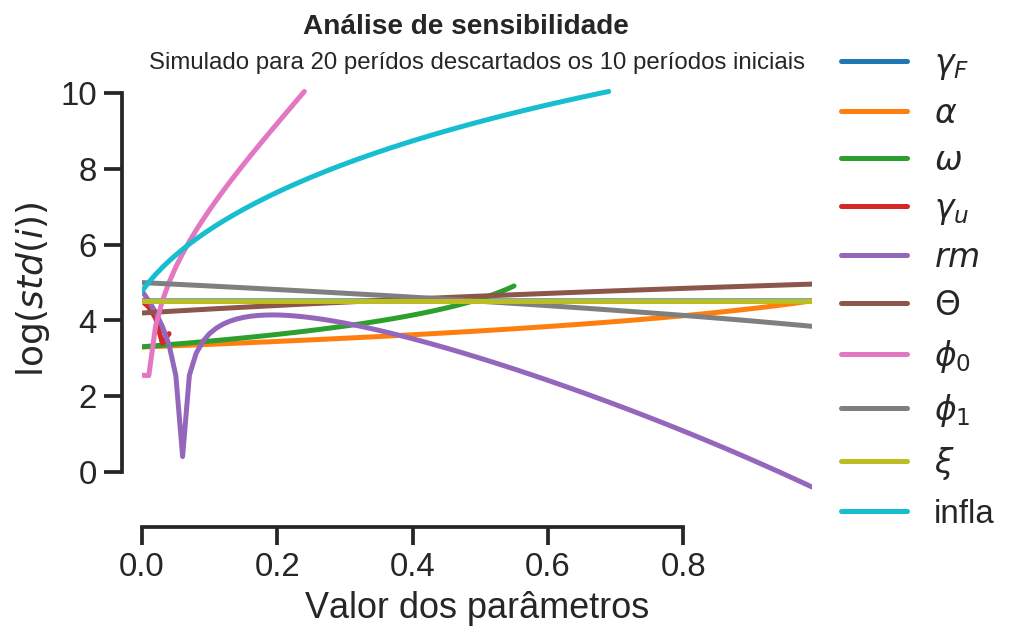

In [0]:
sns.set_context('talk')
fig, ax = plt.subplots()

df_sensibility.plot(
    ax = ax,
    lw = 2.5
)
ax.ticklabel_format(useOffset=False)
ax.set_ylabel("$\log(std(i))$")
ax.set_xlabel("Valor dos parâmetros")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("Análise de sensibilidade", fontsize = 14, weight="bold")
ax.set_title("Simulado para {} perídos descartados os {} períodos iniciais".format(time+skip,skip), fontsize = 12, y = .98)

sns.despine(offset=10, trim=True);

ylim = ax.get_ylim()


plt.show()

In [0]:
#bound = [i/100 for i in range(1,101)] ################################ Changed
bound = [i/100 + 2.0 for i in range(1,101)]
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                v = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility_v = pd.DataFrame()
df_sensibility_v["$v$"] = empty_list ################### Replace here
df_sensibility_v.index = df_sensibility_v.index/100 + 2.0
df_sensibility_v.head()
############################### End #####################################################

,$v$
2.00,4.415242
2.01,4.417147
2.02,4.419061
2.03,4.420974
2.04,4.422892


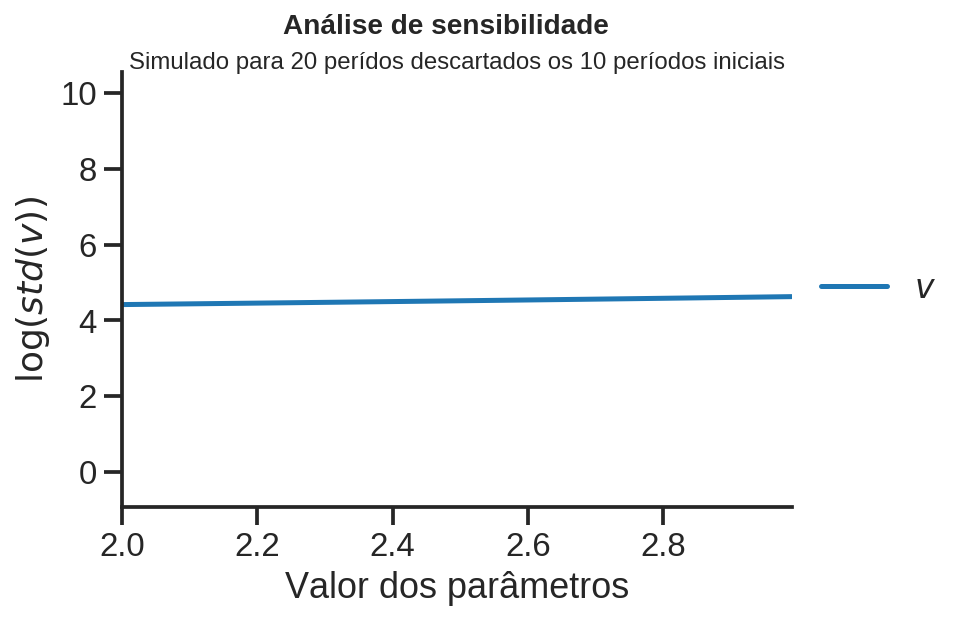

In [0]:
sns.set_context('talk')
fig, ax = plt.subplots()

df_sensibility_v.plot(
    ax = ax,
    lw = 2.5, 
)
ax.ticklabel_format(useOffset=False)
ax.set_ylabel("$\log(std(v))$")
ax.set_xlabel("Valor dos parâmetros")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(ylim)

fig.suptitle("Análise de sensibilidade", fontsize = 14, weight="bold")
ax.set_title("Simulado para {} perídos descartados os {} períodos iniciais".format(time+skip,skip), fontsize = 12, y = .98)

sns.despine()
plt.show()

# Finishing

In [0]:
print("Total running time: ", datetime.now() - t1)
print("Simulation running time: ", t2 - t1)
print("Sobol running time: ", datetime.now() - t2)

Total running time:  0:09:57.322768
Simulation running time:  0:01:00.783516
Sobol running time:  0:08:56.540577


# TODO

- Corrigir path plot
- Testar variável aleatória
- Testar AR
- Corrigir solução analítica
- Preço e valor dos estoque

# Analytical solution

In [0]:
base_eq = model()
SolveSFC(base_eq, time=1, table = False)
t = sp.Symbol('t')
initials = {
    key: base_eq.evaluate(key) for key in base_eq.parameters
}
initials.update({key: base_eq.evaluate(key) for key in base_eq.variables})

Model variables

In [0]:
for i in base_eq.variables:
  globals()["_" + i] = sp.Function(i)

Model parameters

In [0]:
for i in base_eq.parameters:
  globals()[i] = sp.symbols(i, positive=True)

Defining equations

## General equations

In [0]:
Y = _C(t) + _I_t(t)
I = _I_f(t) + _I_h(t)
Yk = _K_f(t-1)/v
u = _Y(t)/_Yk(t)
Z = _I_h(t)
W = _omega(t)*_Y(t)
K = _K_HD(t) + _K_f(t)

## Households

In [0]:
C = alpha*_W(t)
YD = _W(t) + _FD(t) + rm*_M(t-1) - _rmo(t)*_MO(t-1)
S_h = _YD(t) - _C(t)
dMO = _I_h(t)
V_h = _M(t) + _K_HD(t) - _MO(t)
NFW_h = _S_h(t) - _I_h(t)

## Firms

In [0]:
I_f = _h(t)*_Y(t)
dK_f = _I_f(t)
L = _I_f(t) - _FU(t) + _L(t-1)
FT = _FU(t) + _FD(t)
FU = gamma_F*(_FT(t) - _rl(t)*_L(t-1))
FD = (1 - gamma_F)*(_FT(t) - _rl(t)*_L(t-1))
h = _h(t-1)*gamma_u*(_u(t)-un) + _h(t-1)
NFW_f = _FU(t) - _I_f(t)
V_f = _K_f(t) - _L(t)

## Banks

In [0]:
M = (_L(t) - _L(t-1)) + (_MO(t) - _MO(t-1)) + _M(t-1)
rmo = rm + spread_mo
rl = rm + spread_l
V_b = _L(t) + _MO(t) - _M(t)
NFW_b = _rl(t)*_L(t-1) + _rmo(t)*_MO(t-1) - rm*_M(t-1)

## Residential Investment

In [0]:
K_HS = _K_HD(t)
Is = _I_h(t)
dK_HD = _I_h(t)*_ph(t-1) + _K_HD(t-1)*(_ph(t) - _ph(t-1))
#dK_HD = _I_h(t)
I_h = (1+_g_Z(t))*_I_h(t-1)
k = _K_HD(t-1)/(_Kreal(t-1))
#infla = (_ph(t) - _ph(t-1))/_ph(t-1)
infla = inflaparam
ph = (1+_infla(t))*_ph(t-1)
own = ((1+_rmo(t))/(1+_infla(t)))-1
g_Z = phi_0 - phi_1*_own(t)

# Rearranging

## Level of GDP

In [0]:
EqY = Y - _Y(t)
EqY = EqY.subs(_C(t), C).subs(_I_t(t), I)
EqY = EqY.subs(_I_f(t), I_f)
EqY = EqY.subs(_W(t), W)
EqY = EqY.subs(_I_h(t), I_h)

EqY = EqY.subs(_g_Z(t), g_Z)
EqY = EqY.subs(_own(t), own)
EqY = EqY.subs(_infla(t), infla)
EqY = sp.solve(EqY, _Y(t))[0].collect(alpha).collect(omegapar)
solY = EqY

print('Y = ', solY)


print('dY/d alpha = ', EqY.diff(alpha))
print('dY/d omega = ', EqY.diff(_omega(t)))
print('dY/d phi_0 = ', EqY.diff(phi_0).collect(alpha).collect(_omega(t)))
print('dY/d phi_1 = ', EqY.diff(phi_1).collect(alpha).collect(_omega(t)))

print("\nGowth rate.....")
gY, h_, gz_ = sp.symbols('gY h gZ')
gY_ = omegapar*gY + h_*gY + h_ + (_Z(t)/_Y(t))*_g_Z(t) - _h(t-1) - gY
gY_ = gY_.subs(_g_Z(t), gz_)
print("gY = ", sp.solve(gY_, gY)[0].collect(_Y(t)), "\nReplacing...")
gY_ = sp.simplify(gY_.subs(_Y(t), _Z(t)*solY/_I_h(t)).subs(_g_Z(t), gz_))
print("gY = ", sp.solve(gY_, gY)[0].collect(gz_))
    
print("\nReplacing the initial values.....")


def replacer(express):
  express = express.subs(alpha, df.loc[discart+2, 'alpha']).subs(_omega(t), df.loc[discart+2, 'omega'])
  express  = express.subs(un, df.loc[discart+1, 'un']).subs(gamma_u, df.loc[discart+1, 'gamma_u'])
  express = express.subs(_u(t), df.loc[discart+2, 'u']).subs(_h(t-1), df.loc[discart+1, 'h'])
  express = express.subs(own, df.loc[discart+2, 'own']).subs(inflaparam, df.loc[discart+1, 'infla']).subs(_I_h(t-1), df.loc[discart+1, 'I_h'])
  express = express.subs(phi_0, df.loc[discart+1, 'phi_0']).subs(phi_1, df.loc[discart+1, 'phi_1']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_h(t), df.loc[discart+1, 'h']).subs(_rmo(t), df.loc[discart+1, 'rmo']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_I_h(t), df.loc[discart+1, 'I_h']).subs(gz_, df.loc[discart+1, 'g_Z'])
  return express

discart = 30
df = SolveSFC(model(), time = discart+20)
df = df.iloc[discart:,:]
EqY = replacer(EqY)
print('Y = ', df.loc[discart, 'Y'])
print('Yhat = ', EqY)
print('hat Y - Y1 = {:.2f}'.format(EqY - df.loc[discart, "Y"]))


print('gY Derivatives values\n')
print('d gY/d alpha > 0?', replacer(gY_.diff(alpha))>0)
print('d gY/d omega > 0?', replacer(gY_.diff(_omega(t)))> 0)
print('d gY/d phi_0 > 0?', replacer(gY_.diff(phi_0)) > 0)
print('d gY/d phi_1 > 0?', replacer(gY_.diff(phi_1)) > 0)



Y =  (-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)
dY/d alpha =  (-inflaparam*omega(t) - omega(t))*(-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)**2
dY/d omega =  -alpha*(inflaparam + 1)*(-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)**2
dY/d phi_0 =  (-inflaparam - 1)*I_h(t - 1)/(alpha*(inflaparam + 1)*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)
dY/d phi_1 =  (-inflaparam + rmo(t))*I_h(t - 1)/(alpha*(inflaparam + 1)*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)

Gowth rate.....
gY =  (-gZ*Z(t) + (-h + h(t - 1))*Y(t))/((h + omega - 1)*Y(t)) 
Replacing...
gY =  (gZ*(alpha*inflaparam*I_h(t)*omega(t) + a

## Capacity output ratio (short-run)

$$
\frac{Y}{K(-1)} = \frac{Y}{K(-1)}\frac{Yk}{Yk} = \frac{u}{v}
$$

$$
\therefore u = \frac{Y}{K(-1)}v
$$

$$
i_{h_t} = \frac{I_h}{K_{t-1}}
$$

$$
K(-1) = (1+g_K(-1))\cdot K(-2)
$$

In [0]:
Equ = Y - _Y(t)
Equ = Equ.subs(_C(t), _C(t)*v/_K_f(t-1)).subs(_I_t(t), _I_t(t)*v/_K_f(t-1)).subs(_Y(t), _u(t))
Equ = Equ.subs(_C(t), C).subs(_I_t(t), I)
Equ = Equ.subs(_I_f(t), I_f)
Equ = Equ.subs(_W(t), W)
Equ = Equ.expand()
Equ = Equ.subs(_Y(t)/_K_f(t-1), _u(t)/v)
i_h = sp.Function('i_h')
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
Equ = Equ.collect(_u(t))
Equ = Equ.subs(_W(t), W)
Equ = sp.solve(Equ, _u(t))[0].factor().collect(alpha*omegapar).collect(_h(t)).collect(1+_gk(t-1))
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
solu = Equ.collect(alpha**2).collect(omegapar).collect(_YD(t)).collect(alpha)
Equ = Equ.subs(_Y(t), EqY)
print('u = ', solu)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))

print("\nReplacing the initial values.....")
Equ = Equ.subs(alpha, df.loc[1,'alpha']).subs(_omega(t), df.loc[1,'omega']).subs(alpha, df.loc[1,'alpha'])
Equ = Equ.subs(_gk(t-1), df.loc[0,'gk']).subs(_h(t), df.loc[1,'h']).subs(v, df.loc[1,'v'])
Equ = Equ.subs(i_h(t), df.loc[1,'I_h']/df.loc[0,'K_f']).subs(_YD(t), df.loc[1, 'YD'])

print('u0 = ', df.loc[0,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[1,'u'] - Equ))

In [0]:
sp.latex(solu).replace("omegapar", "\\omega")
solu

$$
u_{SR} = 
- \frac{v \operatorname{i_{h}}{\left (t \right )}}{\alpha \omega + h{\left (t \right )} - 1}
$$

Rerranging

$$
u_{SR} =  \frac{v\cdot i_h(t)}{1 - \alpha\cdot \omega - h(t)}
$$

Consider $k$ as the fraction between capacity generating capital and total capital (including households' capital):

$$
k = \frac{K_f}{K}
$$

The capacity utilization ration can be definede as:

$$
u = \frac{Y\cdot v}{K \cdot k}
$$

So, dividing Y by houseolds' capital is the same as:

$$
\frac{Y}{(1-k)\cdot K}
$$

Multiplying by $v$:


$$
\frac{Y}{(1-k)\cdot K}\cdot v = \frac{Y\cdot v}{K}\cdot \left(\frac{1}{1-k}\right)
$$

Multiplying and dividing by $k$:

$$
\frac{Y\cdot v}{K\cdot k}\cdot \left(\frac{k}{1-k}\right) = u \cdot \left(\frac{k}{1-k}\right)
$$

Therefore,

$$
Y\frac{v}{K_h} =  u \cdot \left(\frac{k}{1-k}\right)
$$

In [0]:
k = sp.Symbol('k')
solY = solY.subs(_I_h(t), _I_h(t)*v/_K_HD(t)).subs(_I_h(t)/_K_HD(t), gz)
solY = solY - _u(t)*((k)/(1-k))

In [0]:
u_SR = sp.solve(solY, _u(t))[0]
print(sp.latex(u_SR))

$$
u_{SR} = \frac{gz v \left(k - 1\right)}{k \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
k = \frac{gz v \left(k - 1\right)}{u_{SR} \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
\frac{k}{1-k} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

$$
\frac{K_f}{K_H} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

In [0]:
Equ = u_SR
print('u = ', Equ)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))
print('du/d k = ', Equ.diff(k))

print("\nReplacing the initial values.....")
Equ = Equ.subs(alpha, df.loc[20,'alpha']).subs(_omega(t), df.loc[20,'omega']).subs(alpha, df.loc[20,'alpha'])
Equ = Equ.subs(_h(t), df.loc[20,'h']).subs(v, df.loc[20,'v'])
Equ = Equ.subs(k, df.loc[20,'k']).subs(gz, df.loc[19, 'gz'])

print('u0 = ', df.loc[0,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[21,'u'] - Equ))

# Medium run

$$
\Delta h_t = h_{t-1}\cdot \gamma_u\cdot (u_t - un)
$$

In [0]:
Y_MR = solY
Y_MR = Y_MR.subs(_h(t), h).collect(_h(t-1))
print("Y_MR = ", sp.latex(Y_MR))

$$
Y_{MR} =  - \frac{gz v}{\alpha \omega{\left (t \right )} + \gamma_{u} \left(- un + u{\left (t \right )}\right) h{\left (t - 1 \right )} + h{\left (t - 1 \right )} - 1} - \frac{k u{\left (t \right )}}{- k + 1}
$$

In [0]:
u_MR = Y_MR
soluMR = sp.solve(u_MR, _u(t))[0]
soluMR

$$
u_{MR} = 
\frac{1}{2 \gamma_{u} h{\left (t - 1 \right )}} \left(- \alpha \omega{\left (t \right )} + \gamma_{u} un h{\left (t - 1 \right )} - \sqrt{\alpha^{2} \omega^{2}{\left (t \right )} - 2 \alpha \gamma_{u} un h{\left (t - 1 \right )} \omega{\left (t \right )} + 2 \alpha h{\left (t - 1 \right )} \omega{\left (t \right )} - 2 \alpha \omega{\left (t \right )} + \gamma_{u}^{2} un^{2} h^{2}{\left (t - 1 \right )} - 2 \gamma_{u} un h^{2}{\left (t - 1 \right )} + 2 \gamma_{u} un h{\left (t - 1 \right )} - 4 \gamma_{u} v h{\left (t - 1 \right )} \operatorname{i_{h}}{\left (t \right )} + h^{2}{\left (t - 1 \right )} - 2 h{\left (t - 1 \right )} + 1} - h{\left (t - 1 \right )} + 1\right)
$$

# Long run

In [0]:
Y_LR = Y_MR.subs(_u(t), un)
Y_LR = Y_LR.subs(_h(t-1), _h(t))
Y_LR

$$- \frac{\operatorname{I_{h}}{\left (t \right )}}{\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1}$$

In [0]:
u_LR = u_MR.subs(_h(t), h)
u_LR = u_LR.subs(_u(t), un)
u_LR

$$- un - \frac{v \operatorname{i_{h}}{\left (t \right )}}{\alpha \omega{\left (t \right )} + h{\left (t - 1 \right )} - 1}$$